# Predicting Single-to-Regular Giver Conversion using machine learning


### 1. Problem defition 

Use the available data to develop a model for predicting whether a donor will convert from making a non-regular gift to becoming a regular giver within the 6-month period after their first donation (this conversion happens when a donor purchases/subscribes to a product with ‘RG’ in the product name). Your model will use the donor information available at the time of the first donation (including the information about this first donation) to make the prediction. You can frame this task as a classification problem for predicting the likelihood of conversion.

In a statement,
* Conduct Exploratory Data Analysis (EDA) to identify the top behaviours and attributes that are likely to predict whether a donor will convert to a regular giver.
* Develop a classification model for predicting the likelihood of donors to convert to a regular giver.
* Based on your analysis, outline a strategy to help UNICEF Australia prioritisedonors, enabling better targeting and personalisation of marketing efforts and services, and improving their donation performance.

### 2. Data

### 3. Evaluation

### 4. Features

### 5. Modelling

### 6. Experiment

#  
  ### Create data dictionary
  
  1. SupporterID - Unique ID of supporter

  2. Age_Bucket - Group of age range
  
  3. Gender - Gender if known
  
  4. State - State - may be in or outside Australia
  
  5. PostCode - Postcode - may be in or outside Australia
  
  6. Have_Phone - If the donor shared their email address
  
  7. Have_Email - If the donor shared a Phone Number
  
  8. Gift_ID - Unique gift id
  
  9. GiftDate - Date of Gift
  
  10. IsEmergencyGift - Shows if the donation was in response to an emergency or disaster eg earthquake, flood etc
  
  11. Is_First_Gift - Flag if this is the donor's first gift
  
  12. ProductType_Group - Product Type shows what the donor end up donating or subscribing to
  
  13. GiftSolicitationChannel - This is the specific channel within a campaign, the method we reach out to donors like Email, Web etc
  
  14. CampaignSubType_Group - Campaign SubType shows how we reach out to the donor to communicate or ask for a donation
  
  15. AppealSeason - Appeal Season shows the time of year or season linked to the campaign
  
  16. GiftAmount - Dollar amount of the donation
  
  17. ConvertedTo_RG_Within_6M - Flag to indicate if donor converts to a Regular Giver within 6 months of their initial donation. 1 if yes, 0 if no.


## Preparing the tools

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [7]:
df = pd.read_csv('data/Project2Data.csv',low_memory = False)

In [8]:
df.shape

(1780140, 17)

In [9]:
df.head()

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,Is_First_Gift,ProductType_Group,GiftSolicitationChannel,CampaignSubtype_Group,AppealSeason,GiftAmount,ConvertedTo_RG_Within_6M
0,A-990430482,Unknown,NaN,NSW,2166.0,No,No,0062u00000AFwB5AAL,2020-11-04,NaN,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,56.0,0
1,A-990434539,Unknown,NaN,NSW,2027.0,No,No,0062u00000AZ70jAAD,2020-12-03,NaN,Is_First_Gift,Cash - One off,DM,Appeal,Christmas,140.0,0
2,A-990435870,Unknown,NaN,NaN,NaN,No,No,0062u00000Aa42AAAR,2020-12-16,NaN,Is_First_Gift,Cash - Inspired Gifts,DM,Appeal,Non Seasonal,70.0,0
3,A-990435901,Unknown,NaN,NaN,NaN,No,No,0062u00000Aa997AAB,2020-12-17,NaN,Is_First_Gift,Cash - One off,General,Appeal,Non Seasonal,35.0,0
4,C-990018085,Unknown,NaN,VIC,3144.0,No,No,0062u000009YQXHAA4,2015-05-11,Yes,Is_First_Gift,Cash - One off,Inserts,Appeal,Non Seasonal,175.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780140 entries, 0 to 1780139
Data columns (total 17 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   SupporterID               object 
 1   Age_Bucket                object 
 2   Gender                    object 
 3   State                     object 
 4   PostCode                  float64
 5   Have_Phone                object 
 6   Have_Email                object 
 7   Gift_ID                   object 
 8   GiftDate                  object 
 9   IsEmergencyGift           object 
 10  Is_First_Gift             object 
 11  ProductType_Group         object 
 12  GiftSolicitationChannel   object 
 13  CampaignSubtype_Group     object 
 14  AppealSeason              object 
 15  GiftAmount                float64
 16  ConvertedTo_RG_Within_6M  int64  
dtypes: float64(2), int64(1), object(14)
memory usage: 230.9+ MB


In [11]:
df.isna().sum()

SupporterID                       0
Age_Bucket                        0
Gender                       473180
State                         84891
PostCode                     104015
Have_Phone                        0
Have_Email                        0
Gift_ID                           0
GiftDate                          0
IsEmergencyGift             1630762
Is_First_Gift                     0
ProductType_Group                 0
GiftSolicitationChannel       21053
CampaignSubtype_Group             0
AppealSeason                      0
GiftAmount                        0
ConvertedTo_RG_Within_6M          0
dtype: int64

In [12]:
df.columns

Index(['SupporterID', 'Age_Bucket', 'Gender', 'State', 'PostCode',
       'Have_Phone', 'Have_Email', 'Gift_ID', 'GiftDate', 'IsEmergencyGift',
       'Is_First_Gift', 'ProductType_Group', 'GiftSolicitationChannel',
       'CampaignSubtype_Group', 'AppealSeason', 'GiftAmount',
       'ConvertedTo_RG_Within_6M'],
      dtype='object')

In [13]:
df.Age_Bucket.value_counts()

Age_Bucket
Unknown    896559
31-40      243238
41-50      193695
51-60      144225
71+        130145
61-70      113465
19 - 30     58813
Name: count, dtype: int64

In [14]:
df.nlargest(10, 'GiftAmount')  

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,Is_First_Gift,ProductType_Group,GiftSolicitationChannel,CampaignSubtype_Group,AppealSeason,GiftAmount,ConvertedTo_RG_Within_6M
1558484,C-990438993,Unknown,NaN,VIC,3175.0,No,Yes,0062u00000CcDtRAAV,2021-06-08,NaN,Not_First_Gift,Cash - One off,NaN,Appeal,Tax,52500.0,0
1558485,C-990438993,Unknown,NaN,VIC,3175.0,No,Yes,0062u00000Cb4a8AAB,2021-06-08,NaN,Not_First_Gift,Cash - One off,General,Appeal,Tax,52500.0,0
249432,C-990281901,Unknown,Female,QLD,4122.0,Yes,Yes,0062u000009T6FkAAK,2019-06-30,NaN,Not_First_Gift,Cash - One off,Web,Appeal,Tax,28000.0,0
1570719,C-990441507,Unknown,NaN,NaN,NaN,No,Yes,0062u00000C287QAAR,2021-03-17,NaN,Is_First_Gift,Cash - One off,General,Appeal,Non Seasonal,17500.0,0
249433,C-990281901,Unknown,Female,QLD,4122.0,Yes,Yes,0062u000009T6FmAAK,2019-06-30,NaN,Not_First_Gift,Cash - One off,Web,Appeal,Tax,14000.0,0
249434,C-990281901,Unknown,Female,QLD,4122.0,Yes,Yes,0062u000009T6FlAAK,2019-06-30,NaN,Not_First_Gift,Cash - One off,Web,Appeal,Tax,14000.0,0
249435,C-990281901,Unknown,Female,QLD,4122.0,Yes,Yes,0062u000009T6FnAAK,2019-06-30,NaN,Not_First_Gift,Cash - One off,Web,Appeal,Tax,14000.0,0
1313778,C-990393107,Unknown,Female,NSW,2047.0,Yes,Yes,0062u00000DCxSWAA1,2021-10-14,NaN,Not_First_Gift,Cash - One off,DM,Appeal,Autumn,14000.0,0
1604277,C-990454390,Unknown,NaN,QLD,4061.0,Yes,Yes,0062u00000ENmTnAAL,2022-01-31,Yes,Not_First_Gift,Cash - One off,NaN,Appeal,Non Seasonal,14000.0,0
15013,C-990244714,Unknown,Female,NSW,2067.0,No,Yes,0062u0000092fGmAAI,2014-06-05,NaN,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,11200.0,0


In [15]:
df.IsEmergencyGift.value_counts()

IsEmergencyGift
Yes    149378
Name: count, dtype: int64

In [16]:
df.GiftSolicitationChannel.value_counts()

GiftSolicitationChannel
Web              664653
F2F              399568
Door to door     303721
Telemarketing    169273
Retail           122825
DM                24627
Unsolicited       21407
General           17164
EDM               16109
Travel Trip       10548
SMS                3643
B2B                3398
DRTV               1885
Inserts             158
TV                  108
Name: count, dtype: int64

In [17]:
df.Gender.value_counts()

Gender
Female               700209
Male                 606640
Non-Binary               97
Prefer Not To Say        14
Name: count, dtype: int64

In [18]:
df.Age_Bucket.value_counts()

Age_Bucket
Unknown    896559
31-40      243238
41-50      193695
51-60      144225
71+        130145
61-70      113465
19 - 30     58813
Name: count, dtype: int64

In [19]:
df.Is_First_Gift.value_counts()

Is_First_Gift
Not_First_Gift    1589590
Is_First_Gift      190550
Name: count, dtype: int64

In [20]:
df.ConvertedTo_RG_Within_6M.value_counts()

ConvertedTo_RG_Within_6M
0    1637247
1     142893
Name: count, dtype: int64

In [21]:
df.ConvertedTo_RG_Within_6M.value_counts()

ConvertedTo_RG_Within_6M
0    1637247
1     142893
Name: count, dtype: int64

# Data Processing

In [22]:
df["GiftDate"][:10]

0    2020-11-04
1    2020-12-03
2    2020-12-16
3    2020-12-17
4    2015-05-11
5    2017-05-23
6    2021-09-26
7    2021-10-15
8    2021-11-15
9    2021-12-15
Name: GiftDate, dtype: object

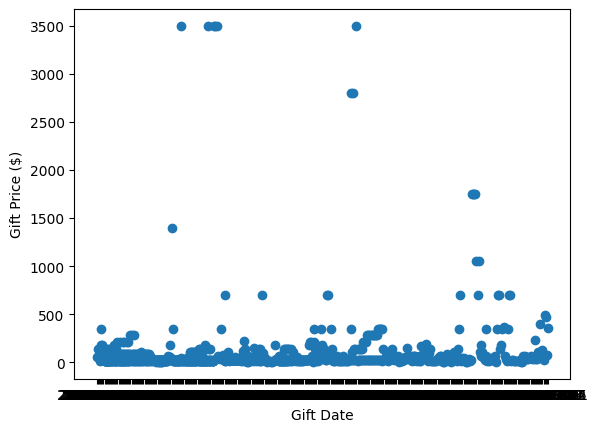

In [23]:
fig, ax = plt.subplots()
ax.scatter(x=df['GiftDate'][:1000], # visualize the first 1000 values
           y=df["GiftAmount"][:1000])
ax.set_xlabel("Gift Date")
ax.set_ylabel("Gift Price ($)");

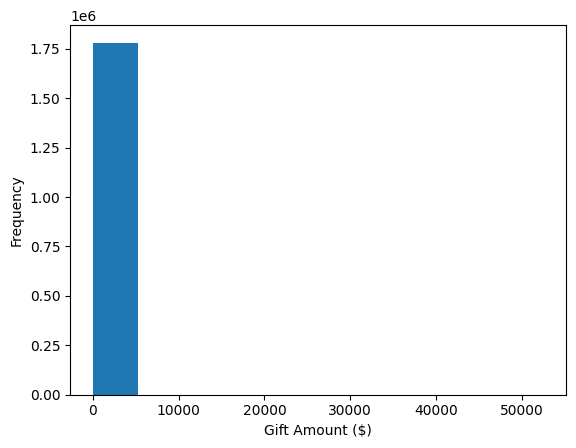

In [24]:
# View Gift Amount distribution 
df.GiftAmount.plot.hist(xlabel="Gift Amount ($)");

In [25]:
df = pd.read_csv(filepath_or_buffer="data/Project2Data.csv",
                 low_memory=False,  
                 parse_dates=["GiftDate"]) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780140 entries, 0 to 1780139
Data columns (total 17 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   SupporterID               object        
 1   Age_Bucket                object        
 2   Gender                    object        
 3   State                     object        
 4   PostCode                  float64       
 5   Have_Phone                object        
 6   Have_Email                object        
 7   Gift_ID                   object        
 8   GiftDate                  datetime64[ns]
 9   IsEmergencyGift           object        
 10  Is_First_Gift             object        
 11  ProductType_Group         object        
 12  GiftSolicitationChannel   object        
 13  CampaignSubtype_Group     object        
 14  AppealSeason              object        
 15  GiftAmount                float64       
 16  ConvertedTo_RG_Within_6M  int64         
dtypes: datet

In [26]:
df["GiftDate"][:10]

0   2020-11-04
1   2020-12-03
2   2020-12-16
3   2020-12-17
4   2015-05-11
5   2017-05-23
6   2021-09-26
7   2021-10-15
8   2021-11-15
9   2021-12-15
Name: GiftDate, dtype: datetime64[ns]

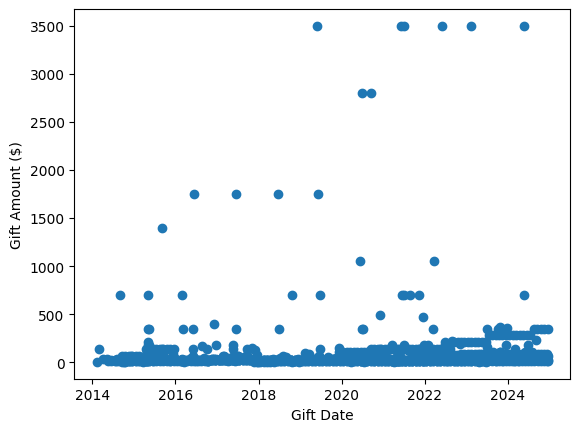

In [27]:
fig, ax = plt.subplots()
ax.scatter(x=df["GiftDate"][:1000], # visualize the first 1000 values
           y=df["GiftAmount"][:1000])
ax.set_xlabel("Gift Date")
ax.set_ylabel("Gift Amount ($)");

In [28]:
# Sort DataFrame in date order
df.sort_values(by=["GiftDate"], inplace=True, ascending=True)
df.GiftDate.head(10), df.GiftDate.tail(10)

(28348   2014-01-01
 28536   2014-01-01
 28366   2014-01-01
 28358   2014-01-01
 28535   2014-01-01
 28356   2014-01-01
 28087   2014-01-01
 28088   2014-01-01
 28089   2014-01-01
 28090   2014-01-01
 Name: GiftDate, dtype: datetime64[ns],
 1596963   2024-12-31
 1768636   2024-12-31
 1760667   2024-12-31
 1766498   2024-12-31
 168640    2024-12-31
 1535372   2024-12-31
 1358954   2024-12-31
 391473    2024-12-31
 987394    2024-12-31
 362048    2024-12-31
 Name: GiftDate, dtype: datetime64[ns])

In [29]:
dup_vals = df["SupporterID"].value_counts()[lambda s: s > 1]
dup_vals

SupporterID
C-990323876    558
C-990325291    469
C-990521347    463
C-990416858    346
C-990285240    325
              ... 
C-990283306      2
C-990353400      2
C-990512265      2
C-990282603      2
C-990443264      2
Name: count, Length: 87367, dtype: int64

In [30]:
sid = "C-990416858"
rows = df.loc[df["SupporterID"] == sid]
rows

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,Is_First_Gift,ProductType_Group,GiftSolicitationChannel,CampaignSubtype_Group,AppealSeason,GiftAmount,ConvertedTo_RG_Within_6M
1477927,C-990416858,19 - 30,NaN,NSW,2074.0,Yes,Yes,0062u000009f6WbAAI,2020-08-03,NaN,Is_First_Gift,RG - Global Parent,Unsolicited,Regular Giving,Non Seasonal,0.70,0
1477928,C-990416858,19 - 30,NaN,NSW,2074.0,Yes,Yes,0062u000009fEfQAAU,2020-08-12,NaN,Not_First_Gift,RG - Global Parent,Unsolicited,Regular Giving,Non Seasonal,0.70,0
1477929,C-990416858,19 - 30,NaN,NSW,2074.0,Yes,Yes,0062u00000ADHowAAH,2020-09-01,NaN,Not_First_Gift,Community Fundraising,NaN,Community Fundraising,Non Seasonal,1.40,0
1477931,C-990416858,19 - 30,NaN,NSW,2074.0,Yes,Yes,0062u000009aTVpAAM,2020-09-15,NaN,Not_First_Gift,RG - Global Parent,Unsolicited,Regular Giving,Non Seasonal,0.70,0
1477930,C-990416858,19 - 30,NaN,NSW,2074.0,Yes,Yes,0062u000009gJtIAAU,2020-09-15,NaN,Not_First_Gift,RG - Global Parent,Unsolicited,Regular Giving,Non Seasonal,0.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478268,C-990416858,19 - 30,NaN,NSW,2074.0,Yes,Yes,006RG00000CSLwyYAH,2024-12-11,NaN,Not_First_Gift,RG - Global Parent,Unsolicited,Regular Giving,Non Seasonal,1.75,0
1478269,C-990416858,19 - 30,NaN,NSW,2074.0,Yes,Yes,006RG00000CSLwQYAX,2024-12-11,NaN,Not_First_Gift,RG - Global Parent,Unsolicited,Regular Giving,Non Seasonal,0.70,0
1478270,C-990416858,19 - 30,NaN,NSW,2074.0,Yes,Yes,006RG00000CSFVWYA5,2024-12-11,NaN,Not_First_Gift,RG - Global Parent,Telemarketing,Regular Giving,Non Seasonal,0.70,0
1478271,C-990416858,19 - 30,NaN,NSW,2074.0,Yes,Yes,006RG00000CSQUQYA5,2024-12-11,NaN,Not_First_Gift,RG - Global Parent,Unsolicited,Regular Giving,Non Seasonal,0.70,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780140 entries, 28348 to 362048
Data columns (total 17 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   SupporterID               object        
 1   Age_Bucket                object        
 2   Gender                    object        
 3   State                     object        
 4   PostCode                  float64       
 5   Have_Phone                object        
 6   Have_Email                object        
 7   Gift_ID                   object        
 8   GiftDate                  datetime64[ns]
 9   IsEmergencyGift           object        
 10  Is_First_Gift             object        
 11  ProductType_Group         object        
 12  GiftSolicitationChannel   object        
 13  CampaignSubtype_Group     object        
 14  AppealSeason              object        
 15  GiftAmount                float64       
 16  ConvertedTo_RG_Within_6M  int64         
dtypes: datetim

In [32]:
col = 'Age_Bucket'
idx_unk = df.index[df[col] == 'Unknown']
counts  = df.loc[df[col] != 'Unknown', col].value_counts()
cats    = counts.index.to_list()
probs   = (counts / counts.sum()).reindex(cats).values

rng = np.random.default_rng(42)  
choices = rng.choice(cats, size=len(idx_unk), p=probs)
df.loc[idx_unk, col] = choices
df = df.loc[df[col].notna() & (df[col] != 'Unknown')].copy()

In [33]:
df.Age_Bucket.value_counts()

Age_Bucket
31-40      489902
41-50      390372
51-60      290811
71+        261985
61-70      228778
19 - 30    118292
Name: count, dtype: int64

In [34]:
df.State.value_counts()

State
NSW        582239
VIC        404205
WA         232220
QLD        214292
ACT        160259
            ...  
ABD             1
N.C.            1
BY              1
9               1
Gujarat         1
Name: count, Length: 229, dtype: int64

In [35]:
df['State'] = df['State'].replace({'Nsw':'NSW'})
df['State'] = df['State'].replace({'Qld':'QLD'})
df['State'] = df['State'].replace({'Vic':'VIC'})
df['State'] = df['State'].replace({'Tas':'TAS'})

In [36]:
top9_states = df["State"].value_counts().head(9).index
ct_top9 = pd.crosstab(df.loc[df["State"].isin(top9_states), "State"],
                      df["ConvertedTo_RG_Within_6M"])
# 按出现频次顺序展示：
states_top9 = ct_top9.reindex(top9_states)
states_top9

ConvertedTo_RG_Within_6M,0,1
State,,
NSW,531872,50371
VIC,360917,43298
WA,218530,13690
QLD,195359,18939
ACT,156024,4235
SA,45941,7105
TAS,25260,2392
NT,11309,681
INT,6920,358


In [37]:
top9 = df["State"].value_counts().nlargest(9).index
# 生成新列：前9保留，其他归为 Other
df["State"] = df["State"].where(df["State"].isin(top9), "Other")

# （可选）固定显示顺序：前9 + Other
order = list(top9) + ["Other"]
df["State"] = pd.Categorical(df["State"], categories=order, ordered=True)

In [38]:
df.State.value_counts()

State
NSW      582243
VIC      404215
WA       232220
QLD      214298
ACT      160259
Other     86939
SA        53046
TAS       27652
NT        11990
INT        7278
Name: count, dtype: int64

In [39]:
df.head()

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,Is_First_Gift,ProductType_Group,GiftSolicitationChannel,CampaignSubtype_Group,AppealSeason,GiftAmount,ConvertedTo_RG_Within_6M
28348,C-990266615,71+,Female,QLD,4701.0,Yes,Yes,0062u000009QPP5AAO,2014-01-01,Yes,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,70.0,0
28536,C-990266661,41-50,Male,VIC,3764.0,Yes,Yes,0062u000009XVQ0AAO,2014-01-01,NaN,Is_First_Gift,Cash - Inspired Gifts,Web,Appeal,Non Seasonal,72.1,0
28366,C-990266630,61-70,NaN,NT,810.0,No,No,0062u000009WNFPAA4,2014-01-01,NaN,Is_First_Gift,Cash - Inspired Gifts,Web,Appeal,Non Seasonal,37.1,0
28358,C-990266629,71+,Female,NSW,2068.0,Yes,Yes,0062u000009QPOwAAO,2014-01-01,Yes,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,105.0,0
28535,C-990266659,31-40,NaN,WA,6005.0,No,No,0062u000009XY0xAAG,2014-01-01,NaN,Is_First_Gift,Cash - Inspired Gifts,Web,Appeal,Non Seasonal,106.4,0


In [40]:
df.isna().sum()

SupporterID                       0
Age_Bucket                        0
Gender                       473180
State                             0
PostCode                     104015
Have_Phone                        0
Have_Email                        0
Gift_ID                           0
GiftDate                          0
IsEmergencyGift             1630762
Is_First_Gift                     0
ProductType_Group                 0
GiftSolicitationChannel       21053
CampaignSubtype_Group             0
AppealSeason                      0
GiftAmount                        0
ConvertedTo_RG_Within_6M          0
dtype: int64

In [41]:
df["PostCode"] = df["PostCode"].fillna("").astype(str).str.split('.').str[0]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1780140 entries, 28348 to 362048
Data columns (total 17 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   SupporterID               object        
 1   Age_Bucket                object        
 2   Gender                    object        
 3   State                     category      
 4   PostCode                  object        
 5   Have_Phone                object        
 6   Have_Email                object        
 7   Gift_ID                   object        
 8   GiftDate                  datetime64[ns]
 9   IsEmergencyGift           object        
 10  Is_First_Gift             object        
 11  ProductType_Group         object        
 12  GiftSolicitationChannel   object        
 13  CampaignSubtype_Group     object        
 14  AppealSeason              object        
 15  GiftAmount                float64       
 16  ConvertedTo_RG_Within_6M  int64         
dtypes: categor

Mosaic Data

In [43]:
postcode_df = pd.read_csv('data/PostcodeData.csv')

In [44]:
postcode_df.head()

,POSTCODE,TOTAL_HOUSEHOLD_COUNT,STATE,DOMINANT_MOSAIC_GROUP,DOMINANT_MOSAIC_TYPE,MOSAIC_GROUP_A,MOSAIC_GROUP_B,MOSAIC_GROUP_C,MOSAIC_GROUP_D,MOSAIC_GROUP_E,...,MOSAIC_TYPE_L43,MOSAIC_TYPE_L44,MOSAIC_TYPE_M45,MOSAIC_TYPE_M46,MOSAIC_TYPE_M47,MOSAIC_TYPE_M48,MOSAIC_TYPE_N49,MOSAIC_TYPE_N50,MOSAIC_TYPE_N51,MOSAIC_TYPE_N52
0,800,4179,NT,G,G22,139,1659,0,0,89,...,0,0,0,0,0,0,0,0,0,66
1,810,13511,NT,E,F17,370,599,1749,114,3165,...,0,10,190,41,4,2,0,246,101,111
2,812,6979,NT,F,H26,109,9,421,38,414,...,0,71,154,120,0,0,4,133,46,2
3,820,9665,NT,B,G22,702,2269,1040,204,1283,...,0,0,49,3,0,9,25,102,112,78
4,822,3642,NT,J,J35,52,0,0,80,48,...,574,135,69,7,49,76,81,78,0,0


In [45]:
postcode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2607 entries, 0 to 2606
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   POSTCODE               2607 non-null   int64 
 1   TOTAL_HOUSEHOLD_COUNT  2607 non-null   int64 
 2   STATE                  2607 non-null   object
 3   DOMINANT_MOSAIC_GROUP  2607 non-null   object
 4   DOMINANT_MOSAIC_TYPE   2607 non-null   object
 5   MOSAIC_GROUP_A         2607 non-null   int64 
 6   MOSAIC_GROUP_B         2607 non-null   int64 
 7   MOSAIC_GROUP_C         2607 non-null   int64 
 8   MOSAIC_GROUP_D         2607 non-null   int64 
 9   MOSAIC_GROUP_E         2607 non-null   int64 
 10  MOSAIC_GROUP_F         2607 non-null   int64 
 11  MOSAIC_GROUP_G         2607 non-null   int64 
 12  MOSAIC_GROUP_H         2607 non-null   int64 
 13  MOSAIC_GROUP_I         2607 non-null   int64 
 14  MOSAIC_GROUP_J         2607 non-null   int64 
 15  MOSAIC_GROUP_K       

In [46]:
df["PostCode"] = df["PostCode"].astype(str)

In [47]:
postcode_df["PostCode"] = postcode_df["POSTCODE"].astype(str)

In [48]:
df_merged = df.merge(postcode_df,on="PostCode", how="left")

In [49]:
df_merged

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,...,MOSAIC_TYPE_L43,MOSAIC_TYPE_L44,MOSAIC_TYPE_M45,MOSAIC_TYPE_M46,MOSAIC_TYPE_M47,MOSAIC_TYPE_M48,MOSAIC_TYPE_N49,MOSAIC_TYPE_N50,MOSAIC_TYPE_N51,MOSAIC_TYPE_N52
0,C-990266615,71+,Female,QLD,4701,Yes,Yes,0062u000009QPP5AAO,2014-01-01,Yes,...,132.0,109.0,284.0,7.0,139.0,0.0,133.0,141.0,278.0,28.0
1,C-990266661,41-50,Male,VIC,3764,Yes,Yes,0062u000009XVQ0AAO,2014-01-01,NaN,...,36.0,43.0,77.0,0.0,270.0,0.0,55.0,74.0,179.0,1.0
2,C-990266630,61-70,NaN,NT,810,No,No,0062u000009WNFPAA4,2014-01-01,NaN,...,0.0,10.0,190.0,41.0,4.0,2.0,0.0,246.0,101.0,111.0
3,C-990266629,71+,Female,NSW,2068,Yes,Yes,0062u000009QPOwAAO,2014-01-01,Yes,...,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,61.0
4,C-990266659,31-40,NaN,WA,6005,No,No,0062u000009XY0xAAG,2014-01-01,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780135,C-990434912,41-50,NaN,WA,6163,Yes,Yes,006RG00000F6YrCYAV,2024-12-31,Yes,...,0.0,102.0,1930.0,747.0,214.0,208.0,334.0,236.0,519.0,501.0
1780136,C-990398176,41-50,Male,NSW,2168,Yes,No,006RG00000F6BeWYAV,2024-12-31,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,902.0
1780137,C-990304023,31-40,Female,NSW,2125,Yes,No,006RG00000F6J0wYAF,2024-12-31,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.0,29.0
1780138,C-990358785,31-40,Female,NSW,2486,Yes,Yes,006RG00000F6j3TYAR,2024-12-31,NaN,...,0.0,995.0,1372.0,794.0,1512.0,785.0,910.0,386.0,1760.0,141.0


In [50]:
unicef_df = df

In [51]:
unicef_df['PostCode'] = unicef_df['PostCode'].astype(str)

In [52]:
postcode_df['POSTCODE'] = postcode_df['POSTCODE'].astype(str)

In [53]:
mosaic_cols = [c for c in postcode_df.columns if c.startswith("MOSAIC_GROUP")]
postcode_df[mosaic_cols] = postcode_df[mosaic_cols].apply(pd.to_numeric, errors='coerce')
postcode_df["MOSAIC_GROUP"] = postcode_df[mosaic_cols].idxmax(axis=1)

In [54]:
mosaic_cols = [c for c in postcode_df.columns if c.startswith("MOSAIC_TYPE")]
postcode_df[mosaic_cols] = postcode_df[mosaic_cols].apply(pd.to_numeric, errors='coerce')
postcode_df["MOSAIC_TYPE"] = postcode_df[mosaic_cols].idxmax(axis=1)

In [55]:
postcode_mosaic = postcode_df[["POSTCODE", "MOSAIC_TYPE", "MOSAIC_GROUP"]]

In [56]:
unicef_df = unicef_df.merge(postcode_mosaic,
                            left_on="PostCode", 
                            right_on="POSTCODE", 
                            how="left")

In [57]:
unicef_df["MOSAIC_GROUP"].value_counts()

MOSAIC_GROUP
MOSAIC_GROUP_A    238443
MOSAIC_GROUP_B    228428
MOSAIC_GROUP_G    177086
MOSAIC_GROUP_C    174762
MOSAIC_GROUP_F    152905
MOSAIC_GROUP_E    129230
MOSAIC_GROUP_K    102880
MOSAIC_GROUP_J     99176
MOSAIC_GROUP_M     97746
MOSAIC_GROUP_H     81298
MOSAIC_GROUP_I     81239
MOSAIC_GROUP_D     53727
MOSAIC_GROUP_L     45937
MOSAIC_GROUP_N      2515
Name: count, dtype: int64

In [58]:
unicef_df.head()

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,Is_First_Gift,ProductType_Group,GiftSolicitationChannel,CampaignSubtype_Group,AppealSeason,GiftAmount,ConvertedTo_RG_Within_6M,POSTCODE,MOSAIC_TYPE,MOSAIC_GROUP
0,C-990266615,71+,Female,QLD,4701,Yes,Yes,0062u000009QPP5AAO,2014-01-01,Yes,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,70.0,0,4701,MOSAIC_TYPE_K37,MOSAIC_GROUP_K
1,C-990266661,41-50,Male,VIC,3764,Yes,Yes,0062u000009XVQ0AAO,2014-01-01,NaN,Is_First_Gift,Cash - Inspired Gifts,Web,Appeal,Non Seasonal,72.1,0,3764,MOSAIC_TYPE_F18,MOSAIC_GROUP_D
2,C-990266630,61-70,NaN,NT,810,No,No,0062u000009WNFPAA4,2014-01-01,NaN,Is_First_Gift,Cash - Inspired Gifts,Web,Appeal,Non Seasonal,37.1,0,810,MOSAIC_TYPE_F17,MOSAIC_GROUP_E
3,C-990266629,71+,Female,NSW,2068,Yes,Yes,0062u000009QPOwAAO,2014-01-01,Yes,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,105.0,0,2068,MOSAIC_TYPE_A01,MOSAIC_GROUP_A
4,C-990266659,31-40,NaN,WA,6005,No,No,0062u000009XY0xAAG,2014-01-01,NaN,Is_First_Gift,Cash - Inspired Gifts,Web,Appeal,Non Seasonal,106.4,0,6005,MOSAIC_TYPE_B07,MOSAIC_GROUP_B


In [59]:
df = unicef_df

In [60]:
df.drop(columns=["POSTCODE"], inplace=True)
df

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,Is_First_Gift,ProductType_Group,GiftSolicitationChannel,CampaignSubtype_Group,AppealSeason,GiftAmount,ConvertedTo_RG_Within_6M,MOSAIC_TYPE,MOSAIC_GROUP
0,C-990266615,71+,Female,QLD,4701,Yes,Yes,0062u000009QPP5AAO,2014-01-01,Yes,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,70.0,0,MOSAIC_TYPE_K37,MOSAIC_GROUP_K
1,C-990266661,41-50,Male,VIC,3764,Yes,Yes,0062u000009XVQ0AAO,2014-01-01,NaN,Is_First_Gift,Cash - Inspired Gifts,Web,Appeal,Non Seasonal,72.1,0,MOSAIC_TYPE_F18,MOSAIC_GROUP_D
2,C-990266630,61-70,NaN,NT,810,No,No,0062u000009WNFPAA4,2014-01-01,NaN,Is_First_Gift,Cash - Inspired Gifts,Web,Appeal,Non Seasonal,37.1,0,MOSAIC_TYPE_F17,MOSAIC_GROUP_E
3,C-990266629,71+,Female,NSW,2068,Yes,Yes,0062u000009QPOwAAO,2014-01-01,Yes,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,105.0,0,MOSAIC_TYPE_A01,MOSAIC_GROUP_A
4,C-990266659,31-40,NaN,WA,6005,No,No,0062u000009XY0xAAG,2014-01-01,NaN,Is_First_Gift,Cash - Inspired Gifts,Web,Appeal,Non Seasonal,106.4,0,MOSAIC_TYPE_B07,MOSAIC_GROUP_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780135,C-990434912,41-50,NaN,WA,6163,Yes,Yes,006RG00000F6YrCYAV,2024-12-31,Yes,Not_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,56.0,0,MOSAIC_TYPE_J31,MOSAIC_GROUP_J
1780136,C-990398176,41-50,Male,NSW,2168,Yes,No,006RG00000F6BeWYAV,2024-12-31,NaN,Not_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,217.7,0,MOSAIC_TYPE_H27,MOSAIC_GROUP_H
1780137,C-990304023,31-40,Female,NSW,2125,Yes,No,006RG00000F6J0wYAF,2024-12-31,NaN,Not_First_Gift,Cash - One off,General,Appeal,Non Seasonal,105.0,0,MOSAIC_TYPE_A02,MOSAIC_GROUP_A
1780138,C-990358785,31-40,Female,NSW,2486,Yes,Yes,006RG00000F6j3TYAR,2024-12-31,NaN,Not_First_Gift,Cash - One off,Web,Appeal,Christmas,140.0,0,MOSAIC_TYPE_N51,MOSAIC_GROUP_M


In [61]:
df.isna().sum()

SupporterID                       0
Age_Bucket                        0
Gender                       473180
State                             0
PostCode                          0
Have_Phone                        0
Have_Email                        0
Gift_ID                           0
GiftDate                          0
IsEmergencyGift             1630762
Is_First_Gift                     0
ProductType_Group                 0
GiftSolicitationChannel       21053
CampaignSubtype_Group             0
AppealSeason                      0
GiftAmount                        0
ConvertedTo_RG_Within_6M          0
MOSAIC_TYPE                  114768
MOSAIC_GROUP                 114768
dtype: int64

In [62]:
df['GiftSolicitationChannel'] = df['GiftSolicitationChannel'].fillna('No or unknown')

In [63]:
df['IsEmergencyGift'] = df['IsEmergencyGift'].fillna('No or unknown')

In [64]:
df['MOSAIC_GROUP'] = df['MOSAIC_GROUP'].fillna('Unknown')

In [65]:
df['MOSAIC_TYPE'] = df['MOSAIC_TYPE'].fillna('Unknown')

In [66]:
df['Gender'] = df['Gender'].fillna('Unknown')

In [67]:
df.Gender.value_counts()

Gender
Female               700209
Male                 606640
Unknown              473180
Non-Binary               97
Prefer Not To Say        14
Name: count, dtype: int64

In [68]:
col = 'Gender'
idx_unk = df.index[df[col] == 'Unknown']
counts  = df.loc[df[col] != 'Unknown', col].value_counts()
cats    = counts.index.to_list()
probs   = (counts / counts.sum()).reindex(cats).values

rng = np.random.default_rng(42)  
choices = rng.choice(cats, size=len(idx_unk), p=probs)
df.loc[idx_unk, col] = choices
df = df.loc[df[col].notna() & (df[col] != 'Unknown')].copy()

In [69]:
df.Gender.value_counts()

Gender
Female               954236
Male                 825755
Non-Binary              132
Prefer Not To Say        17
Name: count, dtype: int64

In [70]:
df.isna().sum()

SupporterID                 0
Age_Bucket                  0
Gender                      0
State                       0
PostCode                    0
Have_Phone                  0
Have_Email                  0
Gift_ID                     0
GiftDate                    0
IsEmergencyGift             0
Is_First_Gift               0
ProductType_Group           0
GiftSolicitationChannel     0
CampaignSubtype_Group       0
AppealSeason                0
GiftAmount                  0
ConvertedTo_RG_Within_6M    0
MOSAIC_TYPE                 0
MOSAIC_GROUP                0
dtype: int64

# Data Exploration (Exploratory data analysis or EDA)


In [71]:
Is_First_Gift = 'Is_First_Gift'           
df_first_gift = df[df['Is_First_Gift'].eq(Is_First_Gift)]
df_first_gift

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,Is_First_Gift,ProductType_Group,GiftSolicitationChannel,CampaignSubtype_Group,AppealSeason,GiftAmount,ConvertedTo_RG_Within_6M,MOSAIC_TYPE,MOSAIC_GROUP
0,C-990266615,71+,Female,QLD,4701,Yes,Yes,0062u000009QPP5AAO,2014-01-01,Yes,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,70.00,0,MOSAIC_TYPE_K37,MOSAIC_GROUP_K
1,C-990266661,41-50,Male,VIC,3764,Yes,Yes,0062u000009XVQ0AAO,2014-01-01,No or unknown,Is_First_Gift,Cash - Inspired Gifts,Web,Appeal,Non Seasonal,72.10,0,MOSAIC_TYPE_F18,MOSAIC_GROUP_D
2,C-990266630,61-70,Male,NT,810,No,No,0062u000009WNFPAA4,2014-01-01,No or unknown,Is_First_Gift,Cash - Inspired Gifts,Web,Appeal,Non Seasonal,37.10,0,MOSAIC_TYPE_F17,MOSAIC_GROUP_E
3,C-990266629,71+,Female,NSW,2068,Yes,Yes,0062u000009QPOwAAO,2014-01-01,Yes,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,105.00,0,MOSAIC_TYPE_A01,MOSAIC_GROUP_A
4,C-990266659,31-40,Female,WA,6005,No,No,0062u000009XY0xAAG,2014-01-01,No or unknown,Is_First_Gift,Cash - Inspired Gifts,Web,Appeal,Non Seasonal,106.40,0,MOSAIC_TYPE_B07,MOSAIC_GROUP_B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412753,C-990524783,51-60,Male,NSW,2121,Yes,Yes,0068v000002NwQhAAK,2022-10-03,Yes,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,153.23,0,MOSAIC_TYPE_E16,MOSAIC_GROUP_E
1412755,C-990524772,31-40,Male,Other,,No,No,0068v000002NvGHAA0,2022-10-03,Yes,Is_First_Gift,Community Fundraising,No or unknown,Community Fundraising,Non Seasonal,799.84,0,Unknown,Unknown
1412757,C-990524773,61-70,Female,Other,,Yes,Yes,0068v000002NvM0AAK,2022-10-03,Yes,Is_First_Gift,Community Fundraising,Web,Community Fundraising,Non Seasonal,21.00,0,Unknown,Unknown
1412761,C-990524776,71+,Male,Other,,No,Yes,0068v000002NvfqAAC,2022-10-03,Yes,Is_First_Gift,Community Fundraising,No or unknown,Community Fundraising,Non Seasonal,22.01,0,Unknown,Unknown


In [72]:
df_first_gift.ConvertedTo_RG_Within_6M.value_counts()

ConvertedTo_RG_Within_6M
0    187181
1      3369
Name: count, dtype: int64

/var/folders/t2/3cdcyzcj38x9cll892r2gjc40000gn/T/ipykernel_29995/14780667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (x='ConvertedTo_RG_Within_6M',data=df_first_gift, palette=['salmon','lightblue'])


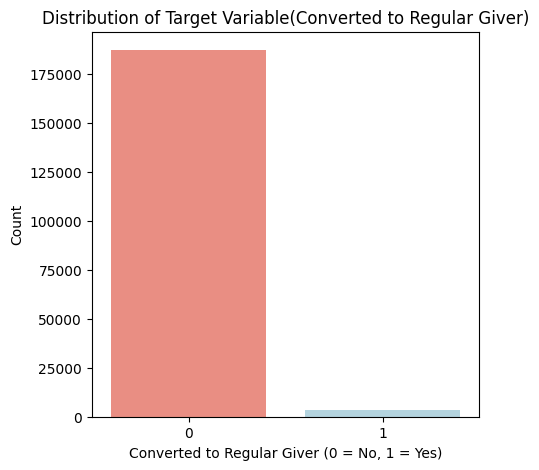

In [73]:
plt.figure(figsize=(5,5))
sns.countplot (x='ConvertedTo_RG_Within_6M',data=df_first_gift, palette=['salmon','lightblue'])
plt.title("Distribution of Target Variable(Converted to Regular Giver)")
plt.xlabel("Converted to Regular Giver (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [74]:
df_first_gift.ConvertedTo_RG_Within_6M.value_counts()/len(df_first_gift)

ConvertedTo_RG_Within_6M
0    0.98232
1    0.01768
Name: count, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

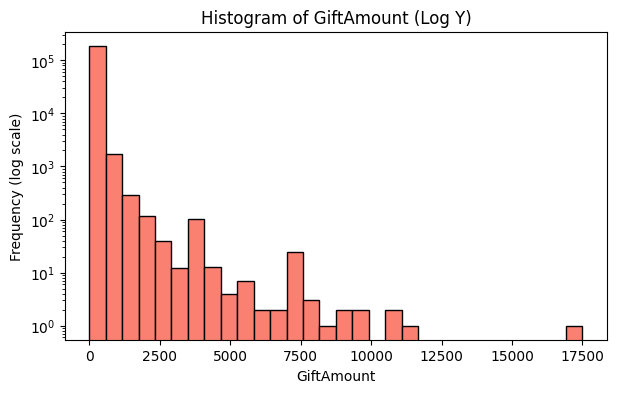

In [97]:
plt.figure(figsize=(7,4))
plt.hist(x, bins=30, edgecolor="black",color=['Salmon'])
plt.yscale("log")
plt.title("Histogram of GiftAmount (Log Y)")
plt.xlabel ("GiftAmount")
plt.ylabel("Frequency (log scale)")
plt.show

/var/folders/t2/3cdcyzcj38x9cll892r2gjc40000gn/T/ipykernel_29995/3581783252.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cr = d.groupby("amt_bin")["ConvertedTo_RG_Within_6M"].mean()      # 各箱转化率
/var/folders/t2/3cdcyzcj38x9cll892r2gjc40000gn/T/ipykernel_29995/3581783252.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n  = d.groupby("amt_bin").size()                                  # 各箱样本数


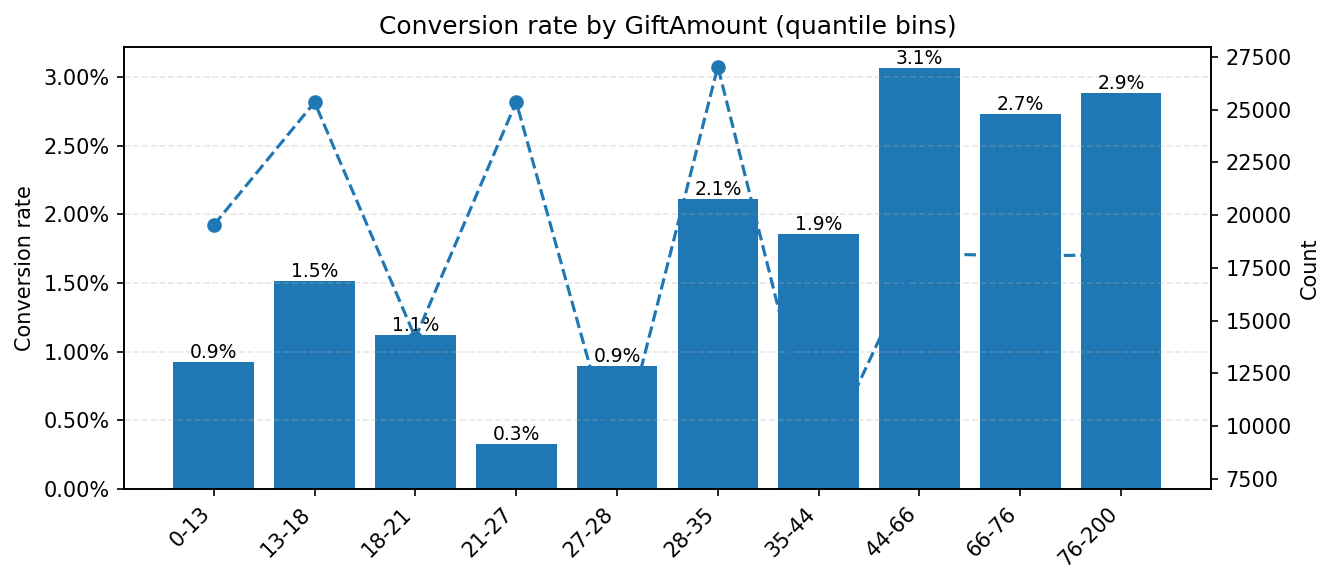

In [118]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

d = df_first_gift.loc[df_first_gift["GiftAmount"]>0, ["GiftAmount","ConvertedTo_RG_Within_6M"]].copy()
d["amt_bin"] = pd.qcut(d["GiftAmount"], q=10, duplicates="drop")  

cr = d.groupby("amt_bin")["ConvertedTo_RG_Within_6M"].mean()      
n  = d.groupby("amt_bin").size()                                 

fig, ax = plt.subplots(figsize=(9,4), dpi=150)
bars = ax.bar(range(len(cr)), cr.values)
ax.set_xticks(range(len(cr)))
ax.set_xticklabels([f"{i.left:.0f}-{i.right:.0f}" for i in cr.index], rotation=45, ha="right")
ax.set_ylabel("Conversion rate"); ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_title("Conversion rate by GiftAmount (quantile bins)")
ax.grid(axis='y', linestyle='--', alpha=0.3)

for b, v in zip(bars, cr.values):
    ax.text(b.get_x()+b.get_width()/2, v, f"{v:.1%}", ha="center", va="bottom", fontsize=9)

ax2 = ax.twinx()
ax2.plot(range(len(n)), n.values, marker='o', linestyle='--')
ax2.set_ylabel("Count")
plt.tight_layout(); plt.show()

In [98]:
corr = df_first_gift[["GiftAmount","ConvertedTo_RG_Within_6M"]].corr()
corr

,GiftAmount,ConvertedTo_RG_Within_6M
GiftAmount,1.000000,0.046572
ConvertedTo_RG_Within_6M,0.046572,1.000000


(2.5, -0.5)

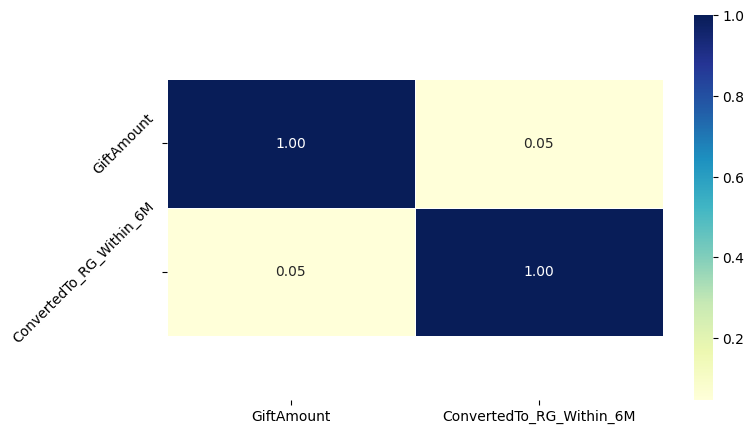

In [99]:
# Let's make our correlation matrix a little prettier
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.heatmap(corr,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.tick_params(axis='y', labelrotation=45)
ax.set_ylim(bottom + 0.5, top - 0.5)

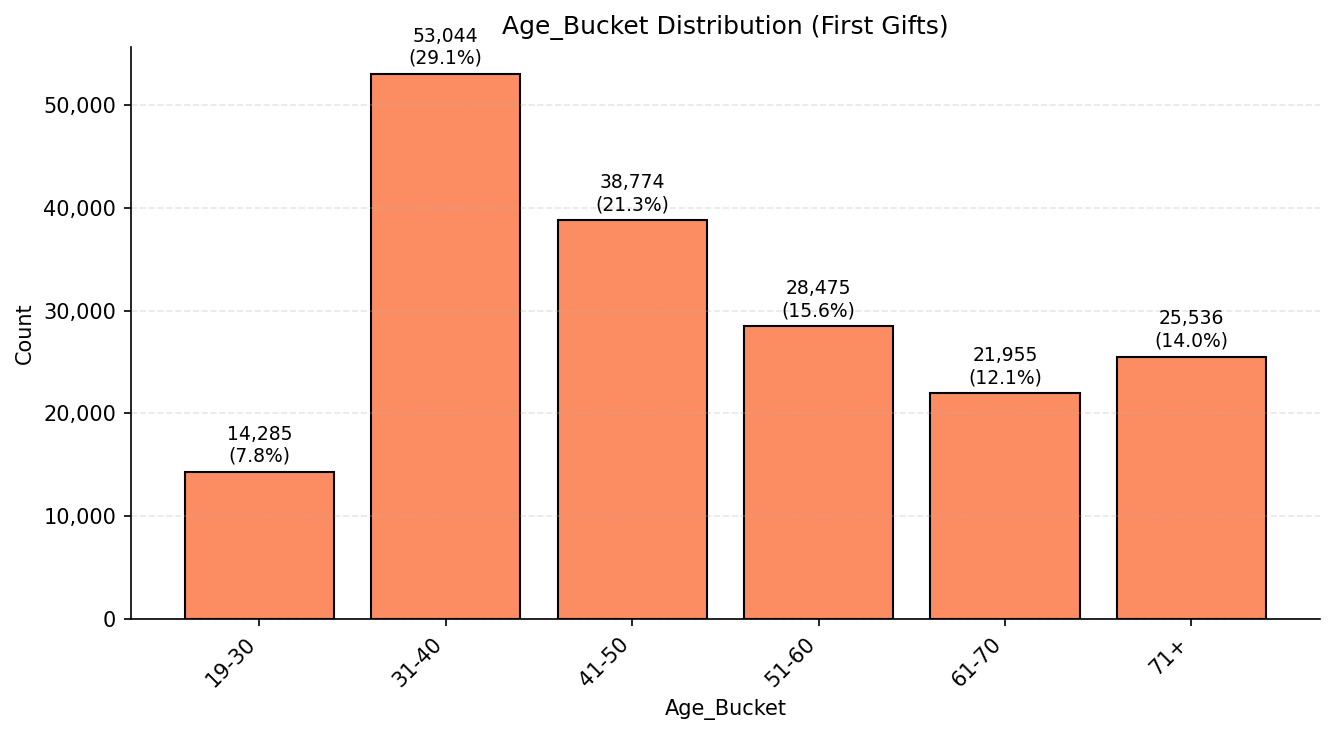

In [116]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


s = df_first_gift['Age_Bucket'].dropna().astype(str)

def bucket_key(x):
    xlow = x.strip().lower()
    nums = re.findall(r'\d+', xlow)

    return (xlow in {'unknown','prefer not to say'}, int(nums[0]) if nums else 10**9)

order = sorted(s.unique(), key=bucket_key)
counts = s.value_counts().reindex(order, fill_value=0)
total = counts.sum()

fig, ax = plt.subplots(figsize=(9,5), dpi=150)
bars = ax.bar(range(len(counts)), counts.values, edgecolor='black', color='#fc8d62')
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(order, rotation=45, ha='right')
ax.set_title('Age_Bucket Distribution (First Gifts)')
ax.set_xlabel('Age_Bucket')
ax.set_ylabel('Count')
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f'{int(v):,}'))
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)

labels = [f'{v:,}\n({v/total:.1%})' for v in counts.values]
try:
    ax.bar_label(bars, labels=labels, padding=3, fontsize=9)
except Exception:
    for b, lab in zip(bars, labels):
        ax.text(b.get_x()+b.get_width()/2, b.get_height(), lab,
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


/var/folders/t2/3cdcyzcj38x9cll892r2gjc40000gn/T/ipykernel_29995/3065309896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_gift['Age_Bucket'] = (df_first_gift['Age_Bucket'].astype('string')
/var/folders/t2/3cdcyzcj38x9cll892r2gjc40000gn/T/ipykernel_29995/3065309896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_gift['Age_Bucket'] = pd.Categorical(df_first_gift['Age_Bucket'], categories=order, ordered=True)


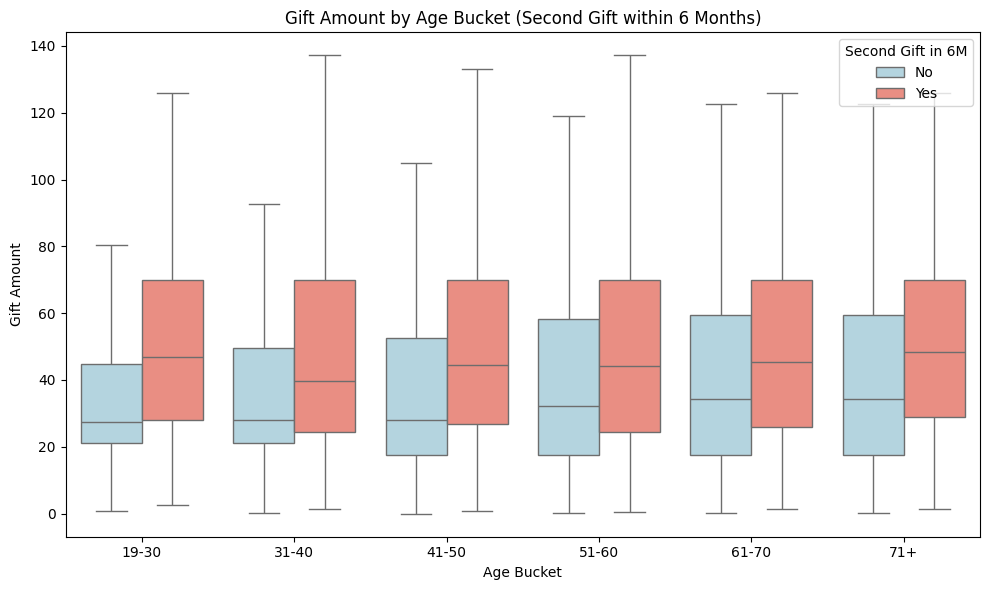

In [101]:
order = ['19-30','31-40','41-50','51-60','61-70','71+']
df_first_gift['Age_Bucket'] = (df_first_gift['Age_Bucket'].astype('string')
                    .str.replace(r'\s*-\s*','-', regex=True)
                    .str.strip())
df_first_gift['Age_Bucket'] = pd.Categorical(df_first_gift['Age_Bucket'], categories=order, ordered=True)

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(
    data=df_first_gift,
    x='Age_Bucket', y='GiftAmount',
    hue='ConvertedTo_RG_Within_6M',        
    hue_order=[0,1],
    palette={0:'lightblue', 1:'salmon'},
    showfliers=False                      
)
ax.set_title('Gift Amount by Age Bucket (Second Gift within 6 Months)')
ax.set_xlabel('Age Bucket')
ax.set_ylabel('Gift Amount')


# 美化图例
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['No', 'Yes'], title='Second Gift in 6M', loc='upper right')

plt.tight_layout()
plt.show()

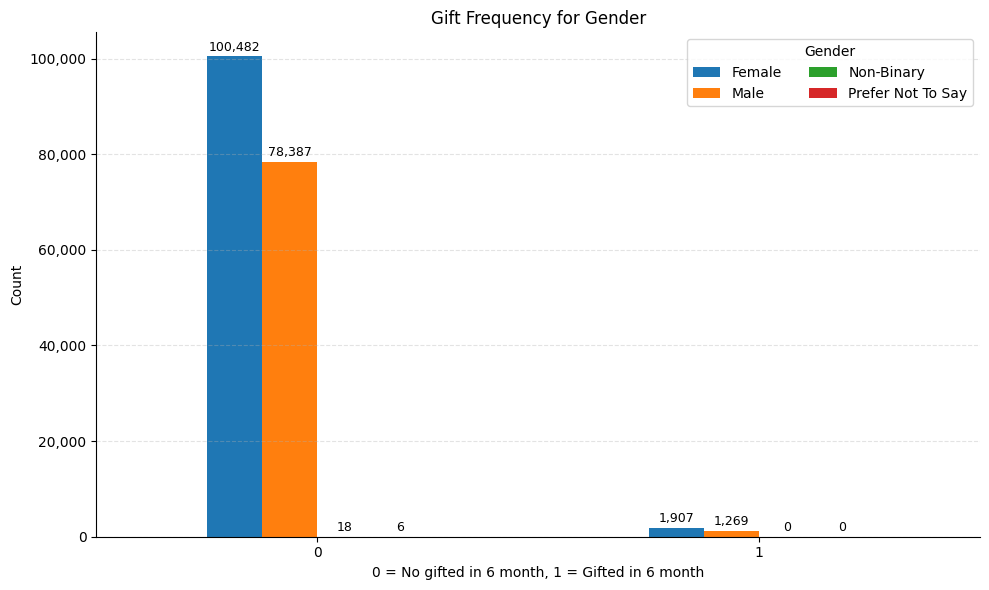

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1) 交叉表
ct = pd.crosstab(df_first_gift['ConvertedTo_RG_Within_6M'],
                 df_first_gift['Gender']).reindex(index=[0, 1], fill_value=0)

# 2) 列顺序：先按常见顺序，再把其余的都接上（自动包含“缺的那个”）
pref = ['Female','Male','Non-Binary','Prefer not to say','Unknown','Other']
cols = [c for c in pref if c in ct.columns] + [c for c in ct.columns if c not in pref]
ct = ct.reindex(columns=cols)

# 3) 颜色数量与列数匹配
colors = plt.get_cmap('tab10').colors[:len(cols)]

# 4) 画图 + 美化
ax = ct.plot(kind='bar', figsize=(10,6), color=colors, rot=0)
ax.set_title('Gift Frequency for Gender')
ax.set_xlabel('0 = No gifted in 6 month, 1 = Gifted in 6 month')
ax.set_ylabel('Count')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.legend(title='Gender', ncol=2)
ax.grid(axis='y', linestyle='--', alpha=0.35)
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)

# 5) 柱顶标数量
for container in ax.containers:
    ax.bar_label(container,
                 labels=[f'{int(v):,}' for v in container.datavalues],
                 padding=2, fontsize=9)

plt.tight_layout(); plt.show()

In [102]:
pd.crosstab(df_first_gift.ConvertedTo_RG_Within_6M,df.Gender)

Gender,Female,Male,Non-Binary,Prefer Not To Say
ConvertedTo_RG_Within_6M,,,,
0,100482,78387,18,6
1,1907,1269,0,0


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

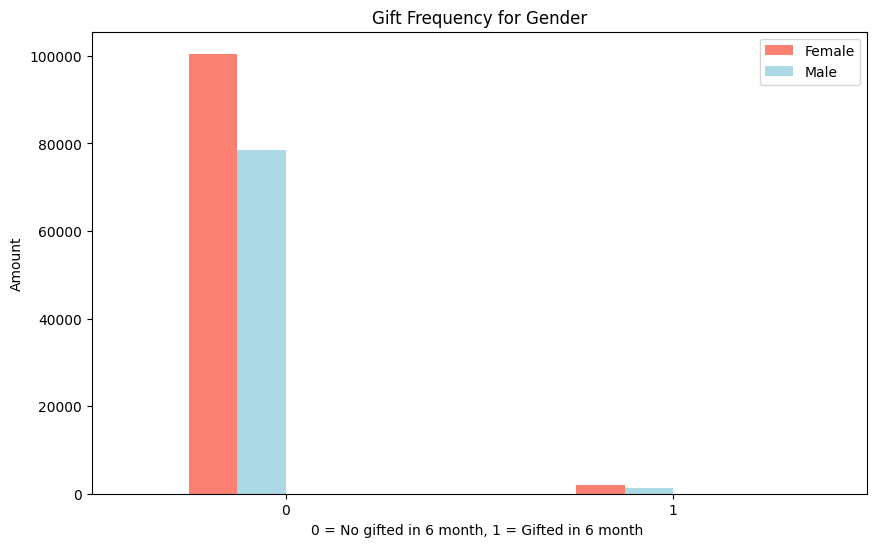

In [103]:
pd.crosstab(df_first_gift.ConvertedTo_RG_Within_6M,df_first_gift.Gender).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue'])
plt.title('Gift Frequency for Gender')
plt.xlabel('0 = No gifted in 6 month, 1 = Gifted in 6 month ')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)

In [104]:
df_first_gift['GiftAmount'].agg(['mean', 'median'])

mean      41.493788
median    28.000000
Name: GiftAmount, dtype: float64

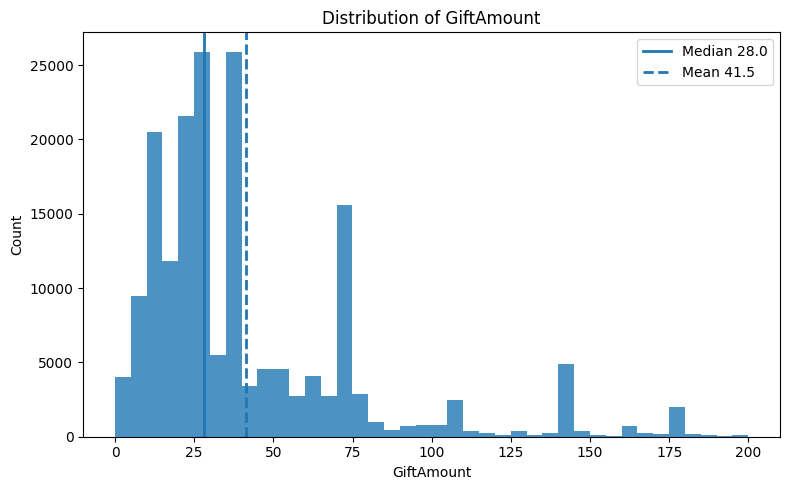

In [105]:
x = df_first_gift['GiftAmount']

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(x, bins=40, density=False, alpha=0.8)
ax.axvline(x.median(), ls='-', lw=2, label=f"Median {x.median():.1f}")
ax.axvline(x.mean(),   ls='--', lw=2, label=f"Mean {x.mean():.1f}")
ax.set_xlabel('GiftAmount'); ax.set_ylabel('Count')
ax.set_title('Distribution of GiftAmount'); ax.legend()

# 如果全部>0，推荐对数横轴，让长尾更清晰
if (x>0).all():
    ax.set_xscale('log')

plt.tight_layout(); plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '19-30'),
  Text(1, 0, '31-40'),
  Text(2, 0, '41-50'),
  Text(3, 0, '51-60'),
  Text(4, 0, '61-70'),
  Text(5, 0, '71+')])

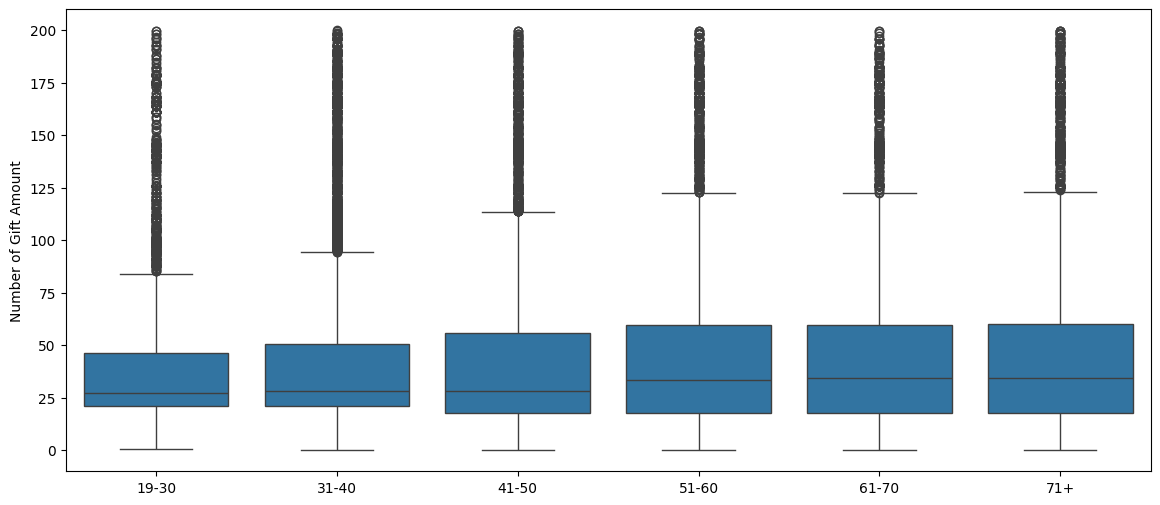

In [106]:
df_first_gift = df_first_gift[df_first_gift['GiftAmount'] <= 200]
fig, ax = plt.subplots(figsize=(14, 6), sharex=True)
sns.boxplot(
    data=df_first_gift,
    x='Age_Bucket',
    y='GiftAmount',
)

plt.title('')
plt.xlabel('')
plt.ylabel('Number of Gift Amount')
plt.xticks(rotation=0)

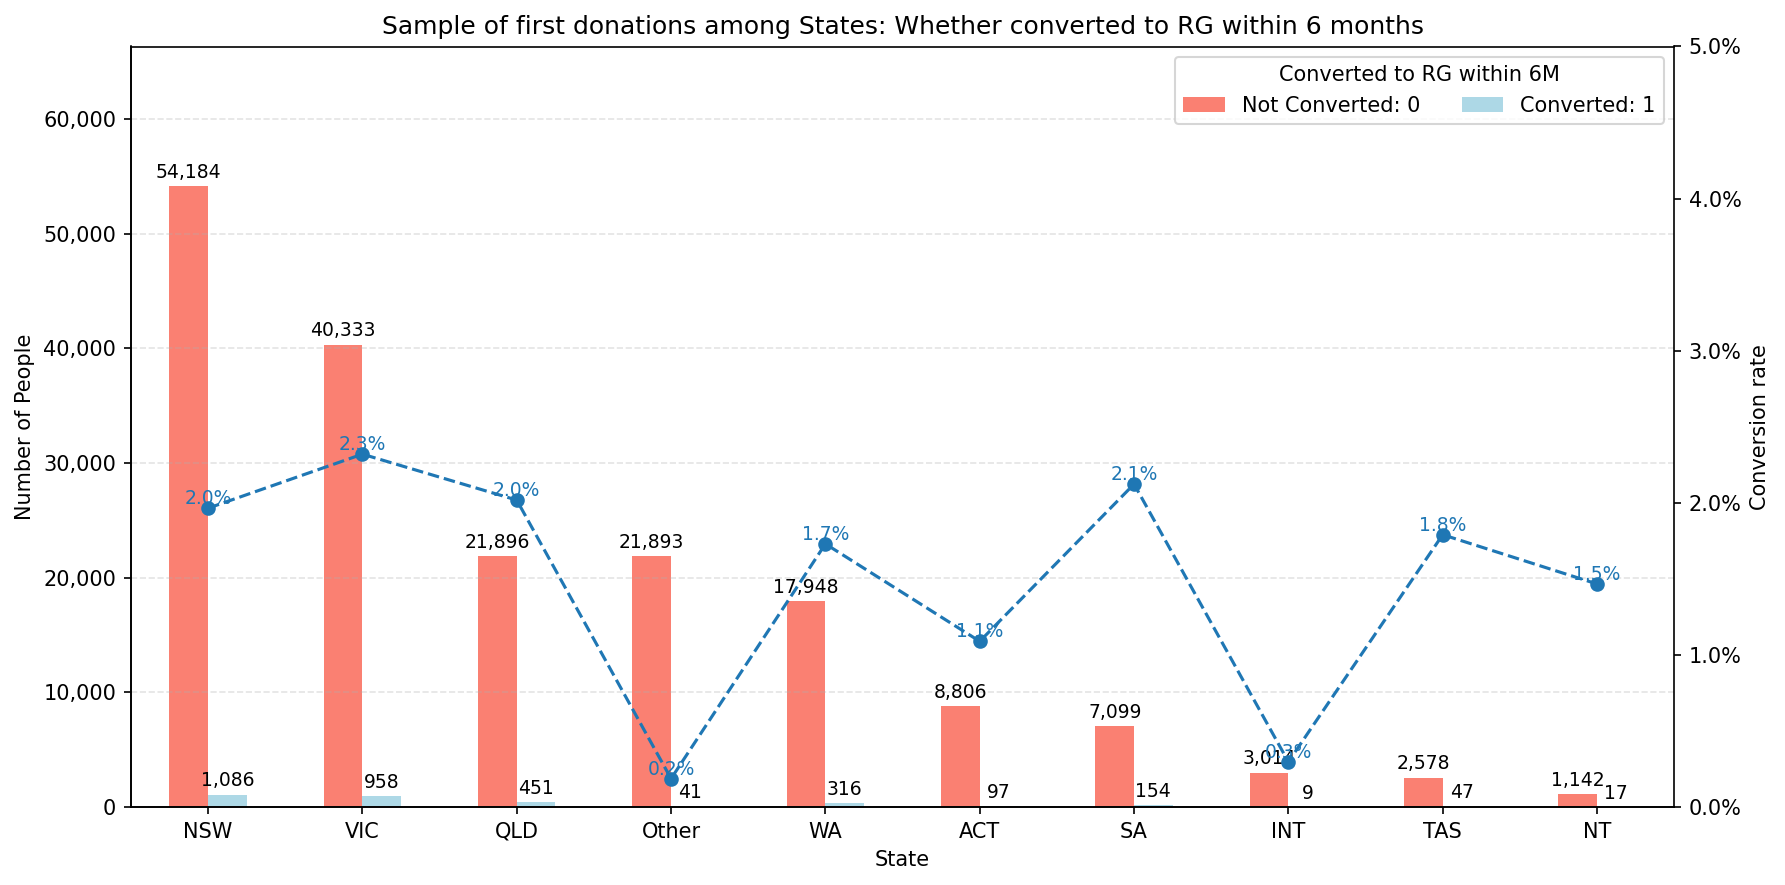

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, PercentFormatter

# 交叉表：各州 × 是否6个月内转化（0/1）
ct = pd.crosstab(df_first_gift["State"], df_first_gift["ConvertedTo_RG_Within_6M"])
ct = ct.reindex(columns=[0, 1], fill_value=0)

# （可选）按总人数降序排列 X 轴
order = ct.sum(axis=1).sort_values(ascending=False).index
ct = ct.loc[order]

# --- 柱状图（人数） ---
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
ct.plot(kind='bar', ax=ax, rot=0, color=['salmon', 'lightblue'])

ax.set_title('Sample of first donations among States: Whether converted to RG within 6 months')
ax.set_xlabel('State')
ax.set_ylabel('Number of People')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.legend(['Not Converted: 0', 'Converted: 1'], title='Converted to RG within 6M', ncol=2)
ax.grid(axis='y', linestyle='--', alpha=0.35)
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)

# 每根柱子顶部标人数
ax.set_ylim(0, ct.sum(axis=1).max() * 1.20)  # 留空间
for container in ax.containers:
    ax.bar_label(container,
                 labels=[f'{int(v):,}' for v in container.datavalues],
                 padding=2, fontsize=9)


# --- 右轴叠加：转化率折线 ---
rate = (ct[1] / ct.sum(axis=1)).values
ax2 = ax.twinx()
ax2.plot(range(len(order)), rate, marker='o', linestyle='--', color='tab:blue', label='Conversion rate')
ax2.set_ylabel('Conversion rate')
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))
ax2.set_ylim(0, max(0.05, rate.max() * 1.4))

# 在折线点上标百分比
for i, r in enumerate(rate):
    ax2.text(i, r, f'{r:.1%}', ha='center', va='bottom', fontsize=9, color='tab:blue')

plt.tight_layout()
plt.show()

/var/folders/t2/3cdcyzcj38x9cll892r2gjc40000gn/T/ipykernel_29995/2803485287.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  rate = first.pivot_table(index='State', columns='Age_Bucket',
/var/folders/t2/3cdcyzcj38x9cll892r2gjc40000gn/T/ipykernel_29995/2803485287.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  n    = first.pivot_table(index='State', columns='Age_Bucket',


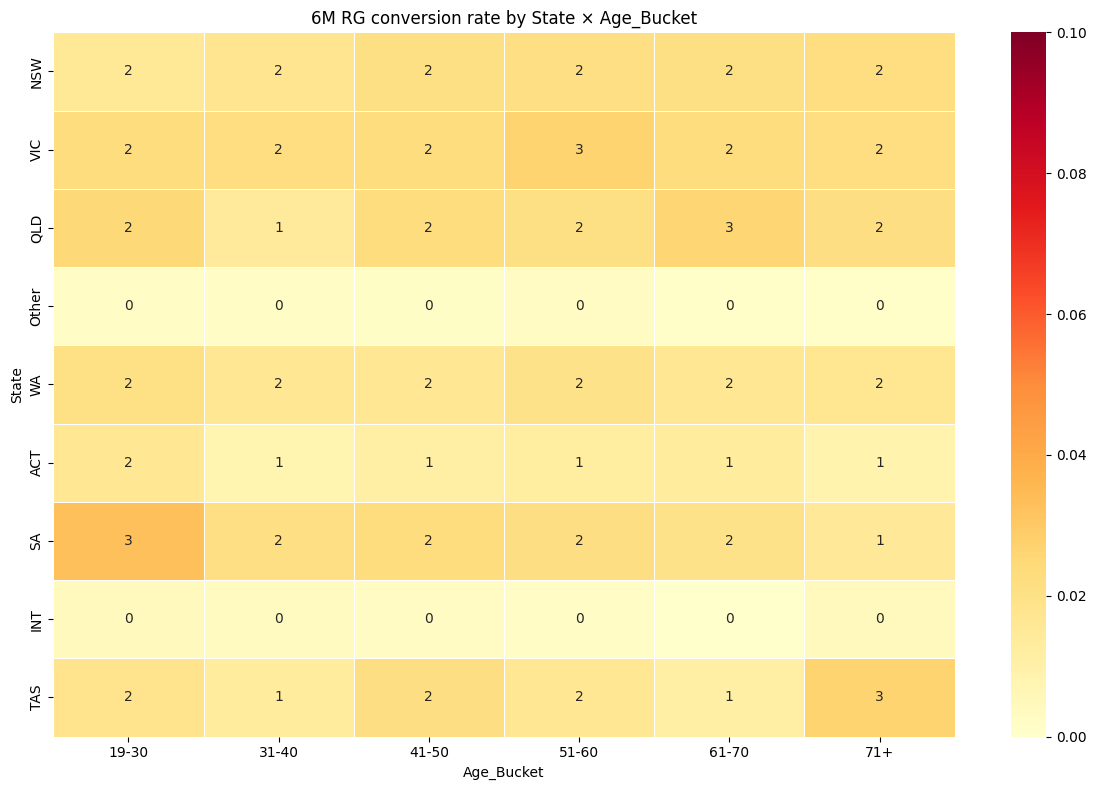

In [109]:
import matplotlib.ticker as mtick
t = df_first_gift.copy()
t['GiftDate'] = pd.to_datetime(t['GiftDate'], errors='coerce')
first = (t.sort_values(['SupporterID','GiftDate'])
           .drop_duplicates('SupporterID', keep='first'))
first['Converted'] = pd.to_numeric(first['ConvertedTo_RG_Within_6M'],
                                   errors='coerce').fillna(0).astype(int)
first = first[first['State'].notna()].copy()
first['Age_Bucket'] = (first['Age_Bucket'].astype('string')
                       .str.replace(r'\s*-\s*','-', regex=True)
                       .str.strip().fillna('Unknown'))

# 2) 透视：转化率矩阵 + 样本量矩阵
rate = first.pivot_table(index='State', columns='Age_Bucket',
                         values='Converted', aggfunc='mean')
n    = first.pivot_table(index='State', columns='Age_Bucket',
                         values='Converted', aggfunc='size').fillna(0).astype(int)

# 丢掉全空的行/列（很关键，否则会画成空白）
rate = rate.dropna(how='all').dropna(how='all', axis=1)
n    = n.reindex_like(rate)

# 选样本量 Top9 的州（用 n 不是用 rate ）
top9 = n.sum(1).sort_values(ascending=False).head(9).index
rate9, n9 = rate.loc[top9], n.loc[top9]

# 3) 画热力图（对 NaN 做遮罩；颜色范围 0–10%）
mask = rate9.isna()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(rate9, mask=mask,
            cmap='YlOrRd', vmin=0, vmax=0.10,
            annot=rate9.mul(100).round().astype('Int64'), fmt='d',
            linewidths=0.5, ax=ax)
ax.set_title('6M RG conversion rate by State × Age_Bucket')
ax.set_xlabel('Age_Bucket'); ax.set_ylabel('State')

cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))  # 你的数据若是0~1
cbar.update_ticks()
plt.tight_layout(); plt.show()
#总体很低：各州×年龄段的 6 个月转为 RG 的比例大多在 1–6%。所以这是个强不平衡问题，后面建模要重视召回/PR-AUC。年龄越大，转化略高：多数州里，61–70、71+ 的格子更“红”（3–6%），年轻段多在 1–3%。这是“年龄梯度”的初步迹象。州间存在差异：同一年龄段，不同州颜色不同（例如你图里 NT 的 71+ ≈6%、SA 的 61–70 ≈5% 看起来更高；ACT 普遍偏低）。说明地理因素或渠道投放在州间有差异。
#但请注意两点：样本量（n）：有的州×年龄段样本可能很小，比例会“跳”。解读前先屏蔽 n<50 或至少在格子里标 n。置信区间：差 1–2 个百分点未必显著，可配合 Wilson CI 或二项检验做显著性判断。

In [110]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [111]:
cluster_features = [ "GiftAmount", "Age_Bucket"]

In [112]:
import numpy as np, pandas as pd, re
from sklearn.preprocessing import StandardScaler

# 1) 把 Age_Bucket → 数值“中点” Age_Midpoint（兼容 '18-24'、'71+'、'Under 18'）
def age_to_midpoint(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    # 抓两端：18-24
    m = re.findall(r'\d+', s)
    if len(m) == 2:
        return (int(m[0]) + int(m[1])) / 2
    if len(m) == 1:   # 71+ 或 under 18
        return float(m[0])
    return np.nan

df_first_gift["Age_Midpoint"] = df_first_gift["Age_Bucket"].apply(age_to_midpoint).astype("float32")

# 2) 只挑用于聚类的数值列，并确保为 numeric
cluster_features = ["GiftAmount", "Age_Midpoint"]
X = df_first_gift[cluster_features].copy()
X["GiftAmount"] = pd.to_numeric(X["GiftAmount"], errors="coerce")
X["Age_Midpoint"] = pd.to_numeric(X["Age_Midpoint"], errors="coerce")

# 丢掉仍有 NaN 的行
X = X.dropna()

# 3) 标准化
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountere

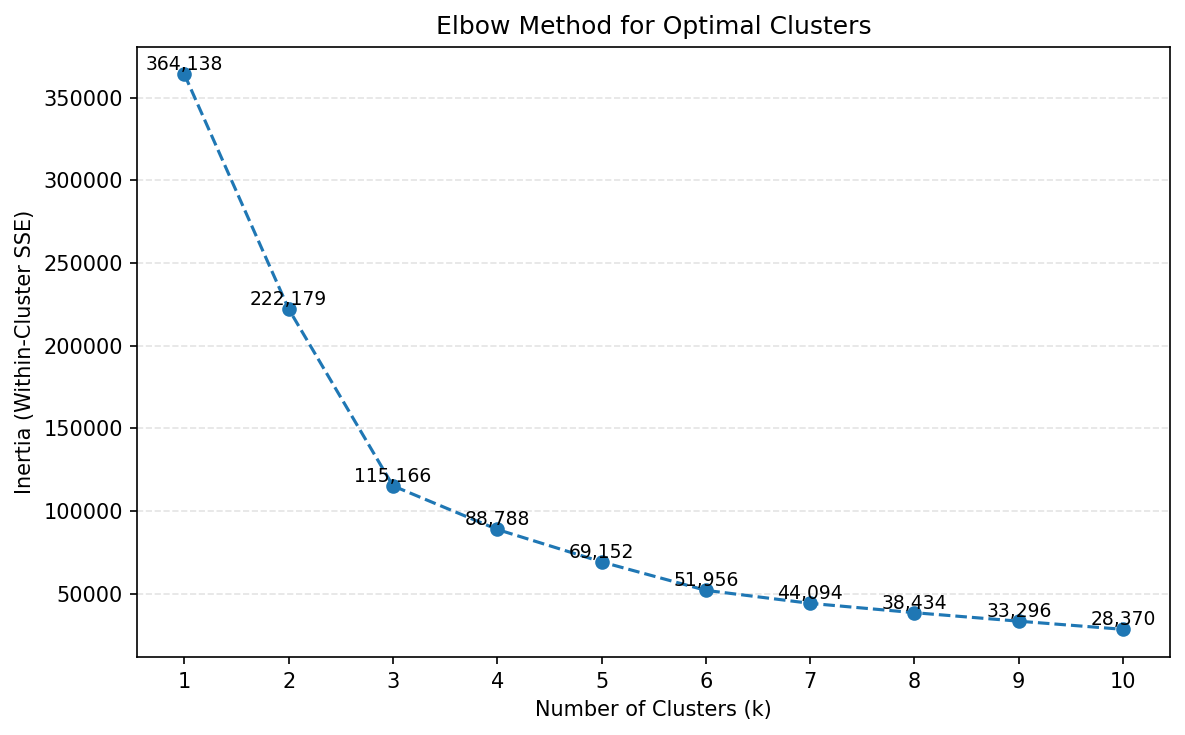

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 2) 计算不同 k 的 SSE(inertia)
inertia = []
K_range = range(1, 11)  # 1~10
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

# 3) 画肘部图
plt.figure(figsize=(8, 5), dpi=150)
plt.plot(list(K_range), inertia, marker='o', linestyle='--')
plt.xticks(list(K_range))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(axis='y', linestyle='--', alpha=0.35)

# 在每个点上方标出数值
for k, sse in zip(K_range, inertia):
    plt.text(k, sse, f'{sse:,.0f}', ha='center', va='bottom', fontsize=9)

# （可选）自动找“肘部”并画竖线 —— 需要安装 kneed；没有也不会报错
try:
    from kneed import KneeLocator
    kl = KneeLocator(list(K_range), inertia, curve='convex', direction='decreasing')
    if kl.elbow is not None:
        plt.axvline(kl.elbow, color='gray', linestyle=':', label=f'Elbow = {kl.elbow}')
        plt.legend()
except Exception:
    pass

plt.tight_layout()
plt.show()

/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/notebook-6.4.1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountere

<Axes: >

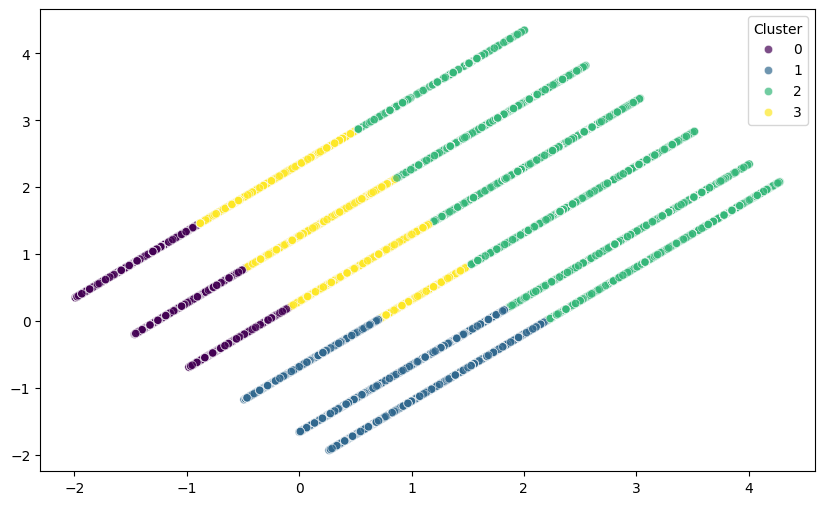

In [114]:
df_cluster = df_first_gift[cluster_features].dropna ()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k,random_state=42,n_init=10)
df_cluster["Cluster"] = kmeans.fit_predict(df_scaled)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_first_gift_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_first_gift_pca[:,0],y=df_first_gift_pca[:,1],hue=df_cluster["Cluster"],palette="viridis",alpha=0.7)

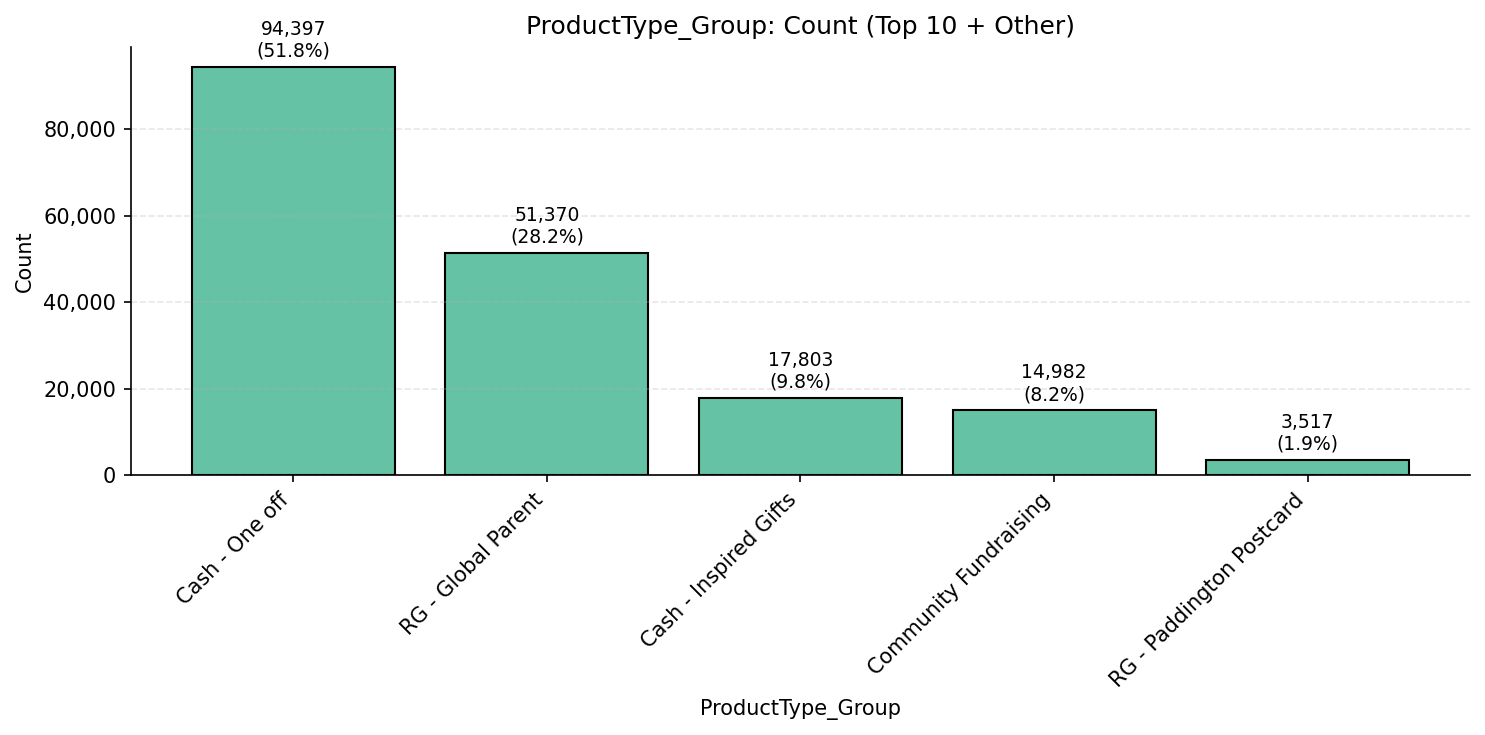

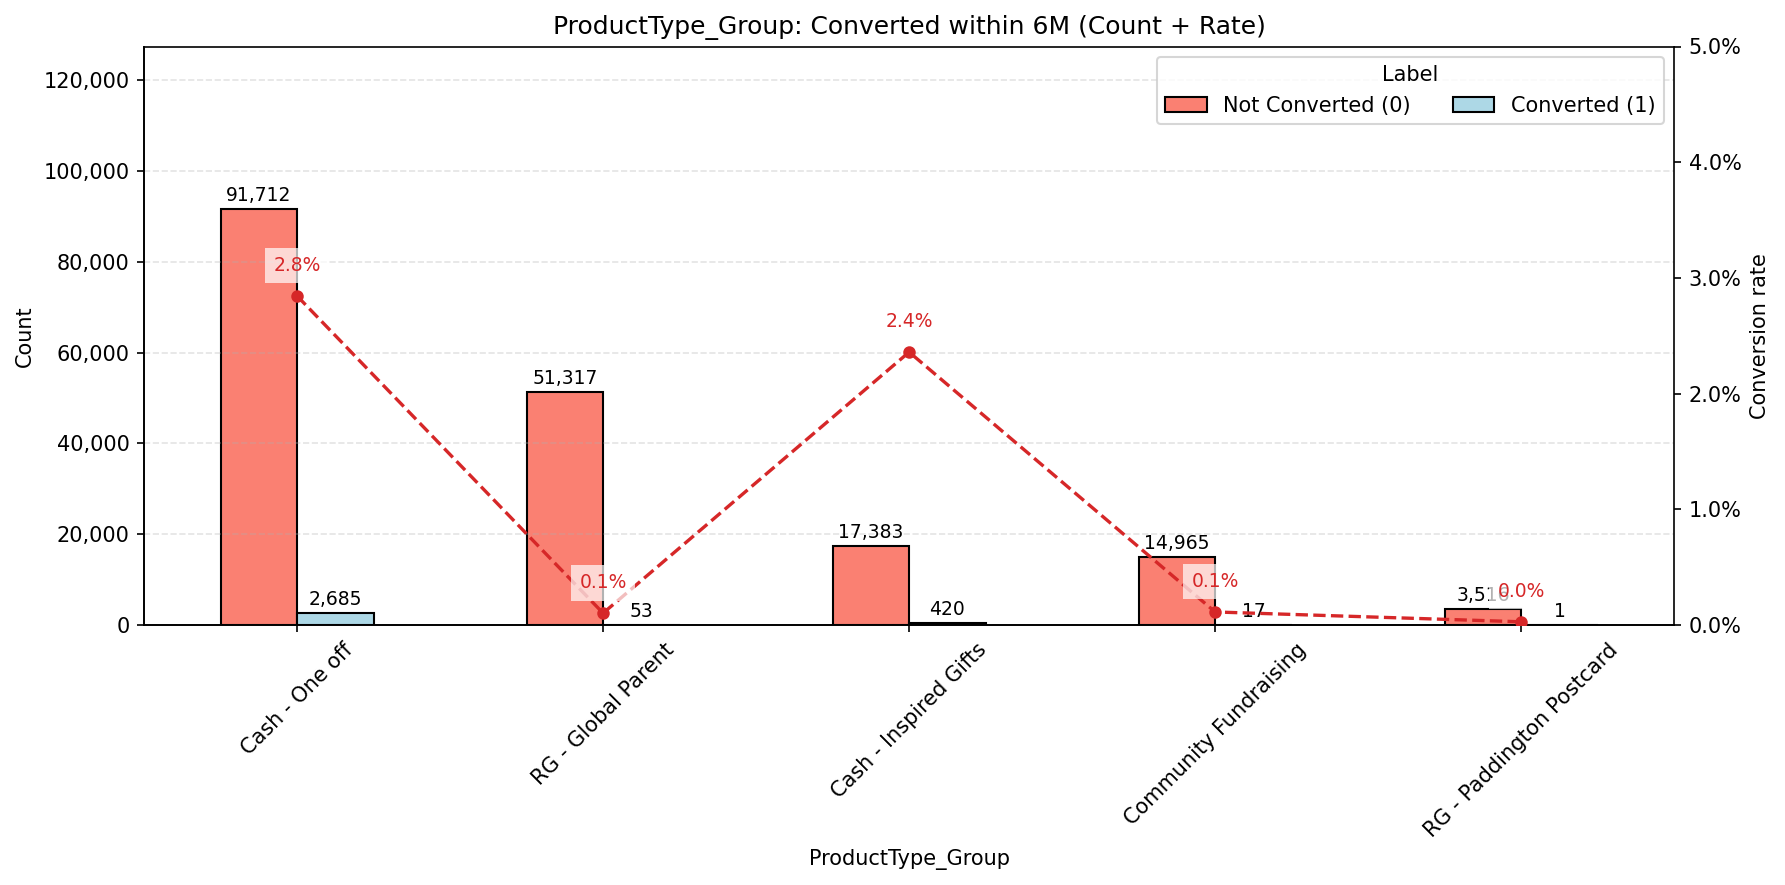

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, PercentFormatter

# ===== 参数 =====
COL = "ProductType_Group"                # 类别列
TARGET = "ConvertedTo_RG_Within_6M"      # 目标列 (0/1)
TOP_N = 10                               # 仅保留前N类，其余合并为 Other
TITLE_PREFIX = "ProductType_Group"       # 标题前缀

# ===== 预处理（基于首捐样本 df_first_gift）=====
d = df_first_gift[[COL, TARGET]].copy()
d[COL] = d[COL].fillna("Unknown").astype(str)

# 前N类 + 其余合并Other
topN = d[COL].value_counts().nlargest(TOP_N).index
d[COL] = np.where(d[COL].isin(topN), d[COL], "Other")

# 设定显示顺序：按样本数降序
order = d[COL].value_counts().sort_values(ascending=False).index.tolist()
d[COL] = pd.Categorical(d[COL], categories=order, ordered=True)

# ===== 图1：数量分布（柱顶标数量+占比）=====
counts = d[COL].value_counts().reindex(order)
total = counts.sum()

fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
bars = ax.bar(range(len(counts)), counts.values, edgecolor="black", color="#66c2a5")
ax.set_xticks(range(len(counts))); ax.set_xticklabels(order, rotation=45, ha="right")
ax.set_title(f"{TITLE_PREFIX}: Count (Top {TOP_N} + Other)")
ax.set_xlabel(COL); ax.set_ylabel("Count")
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{int(v):,}"))
ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.spines["top"].set_visible(False); ax.spines["right"].set_visible(False)

labels = [f"{v:,}\n({v/total:.1%})" for v in counts.values]
try:
    ax.bar_label(bars, labels=labels, padding=3, fontsize=9)
except Exception:
    for b, lab in zip(bars, labels):
        ax.text(b.get_x()+b.get_width()/2, b.get_height(), lab,
                ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

# ===== 图2：转化对比（分组柱 + 右轴转化率折线）=====
ct = pd.crosstab(d[COL], d[TARGET]).reindex(order).reindex(columns=[0,1], fill_value=0)
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
ct.plot(kind="bar", ax=ax, rot=45, color=["salmon", "lightblue"], edgecolor="black")

ax.set_title(f"{TITLE_PREFIX}: Converted within 6M (Count + Rate)")
ax.set_xlabel(COL); ax.set_ylabel("Count")
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{int(v):,}"))
ax.legend(["Not Converted (0)", "Converted (1)"], title="Label", ncol=2)
ax.grid(axis="y", linestyle="--", alpha=0.35)
ax.spines["top"].set_visible(False); ax.spines["right"].set_visible(False)

# 柱顶标数量
ax.set_ylim(0, ct.sum(axis=1).max() * 1.35)
for container in ax.containers:
    ax.bar_label(container,
                 labels=[f"{int(v):,}" for v in container.datavalues],
                 padding=2, fontsize=9)

# 右轴：转化率折线 + 标签
rate = (ct[1] / ct.sum(axis=1)).values
ax2 = ax.twinx()
ax2.plot(range(len(order)), rate, marker="o", linestyle="--", color="tab:red",
         linewidth=1.6, markersize=5, zorder=3, label="Conversion rate")
ax2.set_ylabel("Conversion rate")
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))
ax2.set_ylim(0, max(0.05, rate.max() * 1.4))

for i, r in enumerate(rate):
    ax2.annotate(f"{r:.1%}", xy=(i, r), xytext=(0, 10),
                 textcoords="offset points", ha="center", va="bottom",
                 fontsize=9, color="tab:red",
                 bbox=dict(fc="white", ec="none", alpha=0.7))

plt.tight_layout()
plt.show()

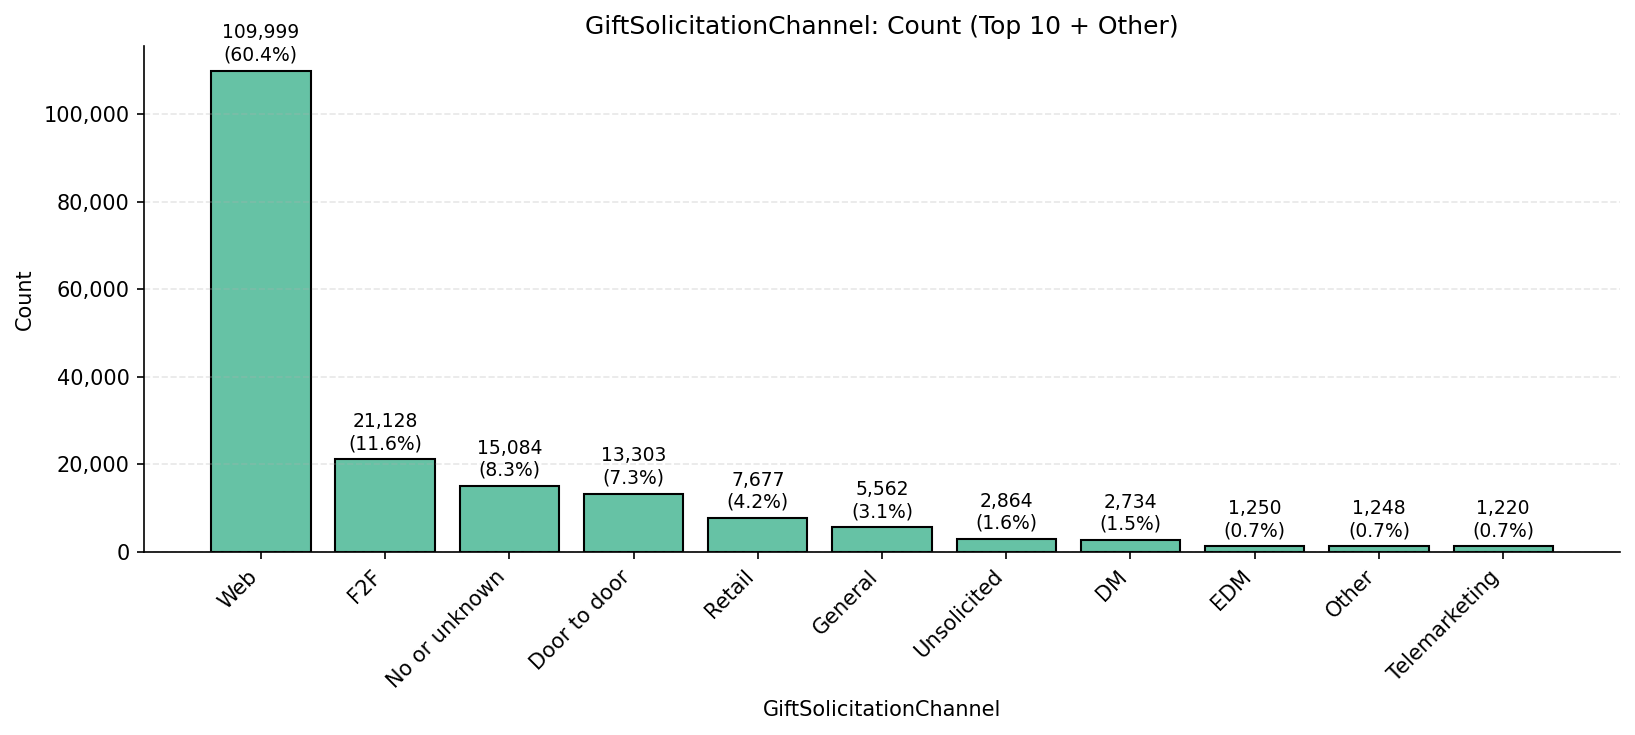

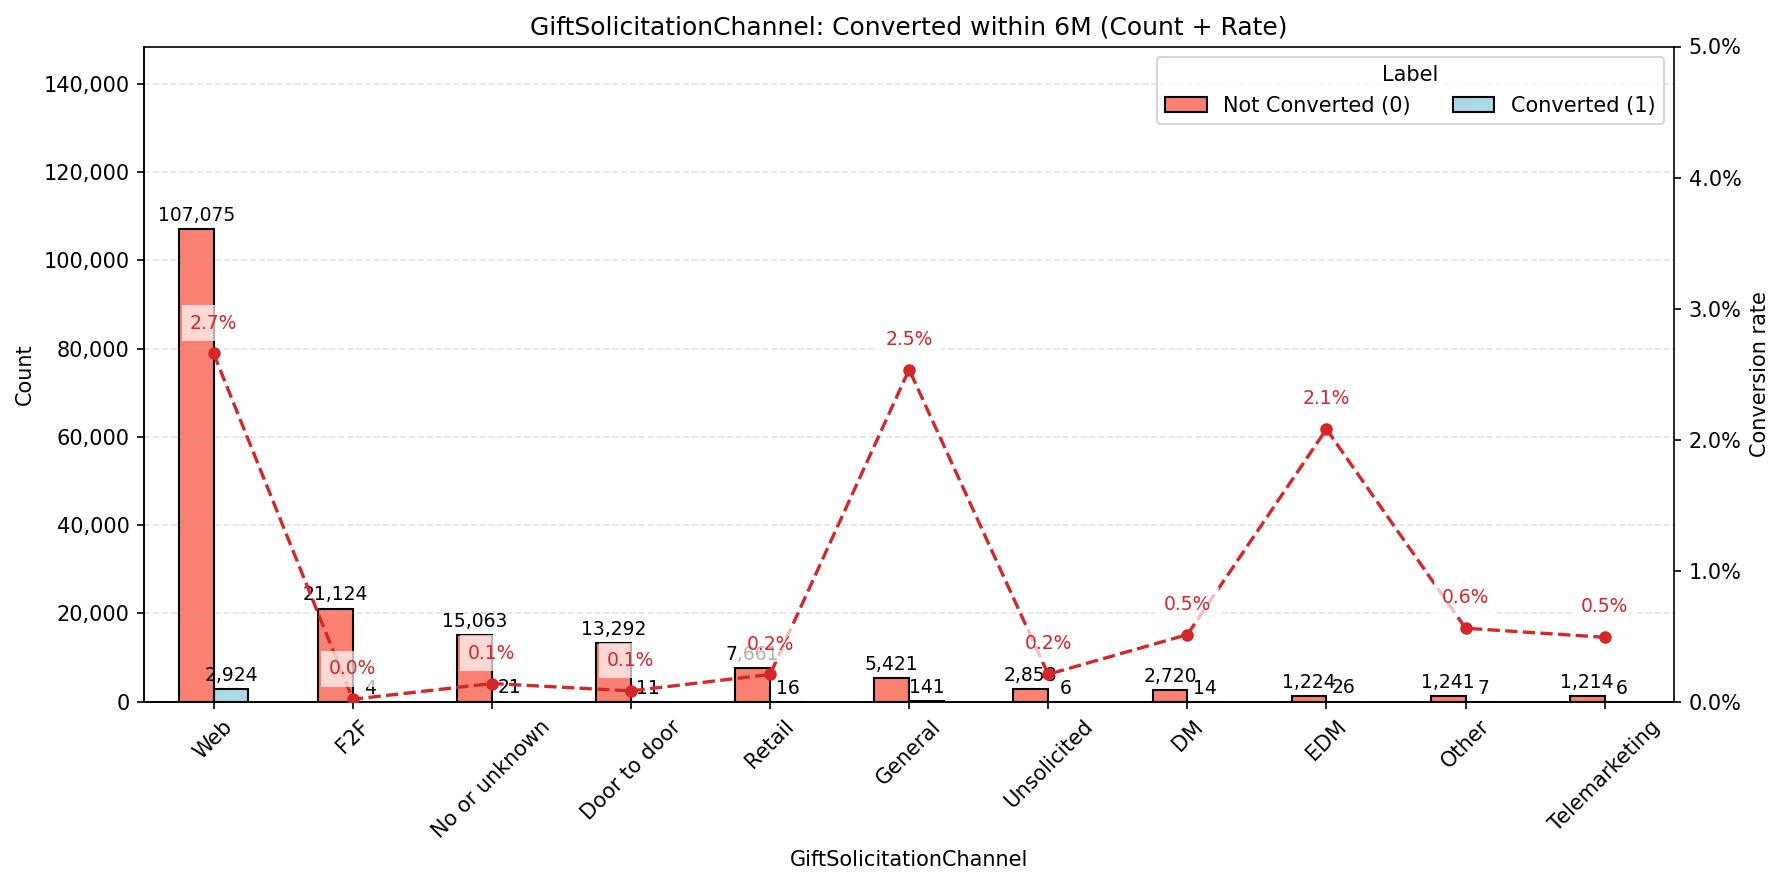

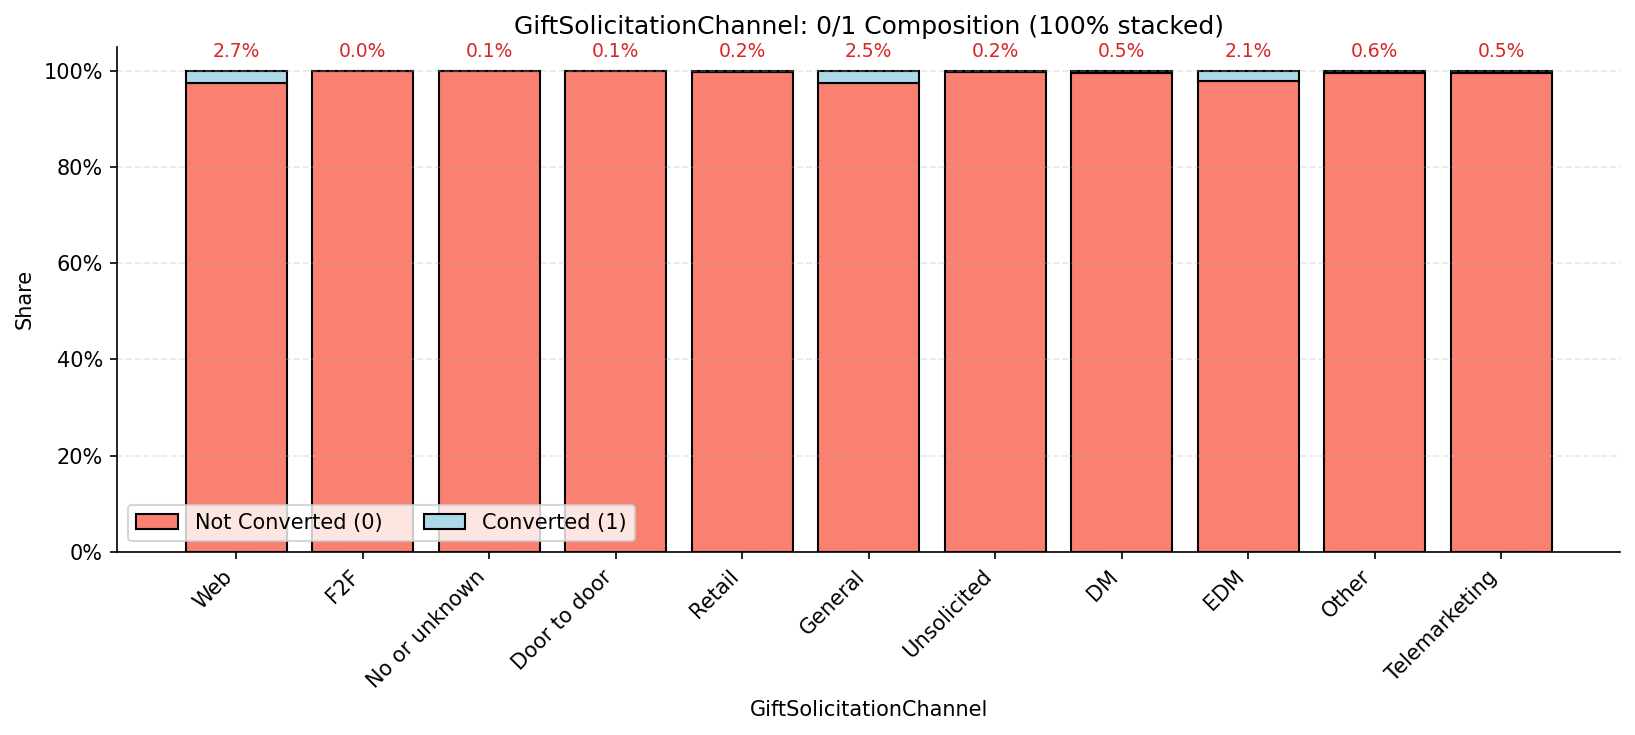

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, PercentFormatter

# ===== 参数 =====
COL    = "GiftSolicitationChannel"       # 要分析的列
TARGET = "ConvertedTo_RG_Within_6M"      # 目标标签 0/1
TOP_N  = 10                               # 仅保留前N类，其余合并为 Other

# ===== 预处理（首捐样本 df_first_gift）=====
d = df_first_gift[[COL, TARGET]].copy()
d[COL] = d[COL].fillna("Unknown").astype(str)

# 前N类 + 其余合并Other
topN = d[COL].value_counts().nlargest(TOP_N).index
d[COL] = np.where(d[COL].isin(topN), d[COL], "Other")

# 按样本数降序固定显示顺序
order = d[COL].value_counts().sort_values(ascending=False).index.tolist()
d[COL] = pd.Categorical(d[COL], categories=order, ordered=True)

# ============== 图1：数量分布（柱顶数量+占比） ==============
counts = d[COL].value_counts().reindex(order)
total  = counts.sum()

fig, ax = plt.subplots(figsize=(11, 5), dpi=150)
bars = ax.bar(range(len(counts)), counts.values, edgecolor="black", color="#66c2a5")
ax.set_xticks(range(len(counts))); ax.set_xticklabels(order, rotation=45, ha="right")
ax.set_title(f"{COL}: Count (Top {TOP_N} + Other)")
ax.set_xlabel(COL); ax.set_ylabel("Count")
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{int(v):,}"))
ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.spines["top"].set_visible(False); ax.spines["right"].set_visible(False)

labels = [f"{v:,}\n({v/total:.1%})" for v in counts.values]
try:
    ax.bar_label(bars, labels=labels, padding=3, fontsize=9)
except Exception:
    for b, lab in zip(bars, labels):
        ax.text(b.get_x()+b.get_width()/2, b.get_height(), lab,
                ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

# ============== 图2：0/1人数 + 右轴转化率折线 ==============
ct = pd.crosstab(d[COL], d[TARGET]).reindex(order).reindex(columns=[0,1], fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
ct.plot(kind="bar", ax=ax, rot=45, color=["salmon", "lightblue"], edgecolor="black")
ax.set_title(f"{COL}: Converted within 6M (Count + Rate)")
ax.set_xlabel(COL); ax.set_ylabel("Count")
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{int(v):,}"))
ax.legend(["Not Converted (0)", "Converted (1)"], title="Label", ncol=2)
ax.grid(axis="y", linestyle="--", alpha=0.35)
ax.spines["top"].set_visible(False); ax.spines["right"].set_visible(False)

# 柱顶数量
ax.set_ylim(0, ct.sum(axis=1).max() * 1.35)
for container in ax.containers:
    ax.bar_label(container,
                 labels=[f"{int(v):,}" for v in container.datavalues],
                 padding=2, fontsize=9)

# 右轴：转化率折线
rate = (ct[1] / ct.sum(axis=1)).values
ax2 = ax.twinx()
ax2.plot(range(len(order)), rate, marker="o", linestyle="--", color="tab:red",
         linewidth=1.6, markersize=5, zorder=3, label="Conversion rate")
ax2.set_ylabel("Conversion rate")
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))
ax2.set_ylim(0, max(0.05, rate.max() * 1.4))

for i, r in enumerate(rate):
    ax2.annotate(f"{r:.1%}", xy=(i, r), xytext=(0, 10),
                 textcoords="offset points", ha="center", va="bottom",
                 fontsize=9, color="tab:red",
                 bbox=dict(fc="white", ec="none", alpha=0.7))

plt.tight_layout()
plt.show()

# ============== （可选）图3：100%堆叠占比，更直观看转化率 ==============
prop = ct.div(ct.sum(axis=1), axis=0)  # 行内标准化
fig, ax = plt.subplots(figsize=(11, 5), dpi=150)
bottom = np.zeros(len(prop))
colors = ["salmon", "lightblue"]
for j, col in enumerate([0,1]):
    vals = prop[col].values
    ax.bar(range(len(order)), vals, bottom=bottom, label=f"{col}", color=colors[j], edgecolor="black")
    bottom += vals

ax.set_xticks(range(len(order))); ax.set_xticklabels(order, rotation=45, ha="right")
ax.set_title(f"{COL}: 0/1 Composition (100% stacked)")
ax.set_xlabel(COL); ax.set_ylabel("Share")
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.legend(["Not Converted (0)", "Converted (1)"], ncol=2)
ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.spines["top"].set_visible(False); ax.spines["right"].set_visible(False)

# 在“Converted(1)”段标注百分比
converted_share = prop[1].values
for i, s in enumerate(converted_share):
    ax.text(i, 1.02, f"{s:.1%}", ha="center", va="bottom", fontsize=9, color="tab:red")

plt.tight_layout()
plt.show()

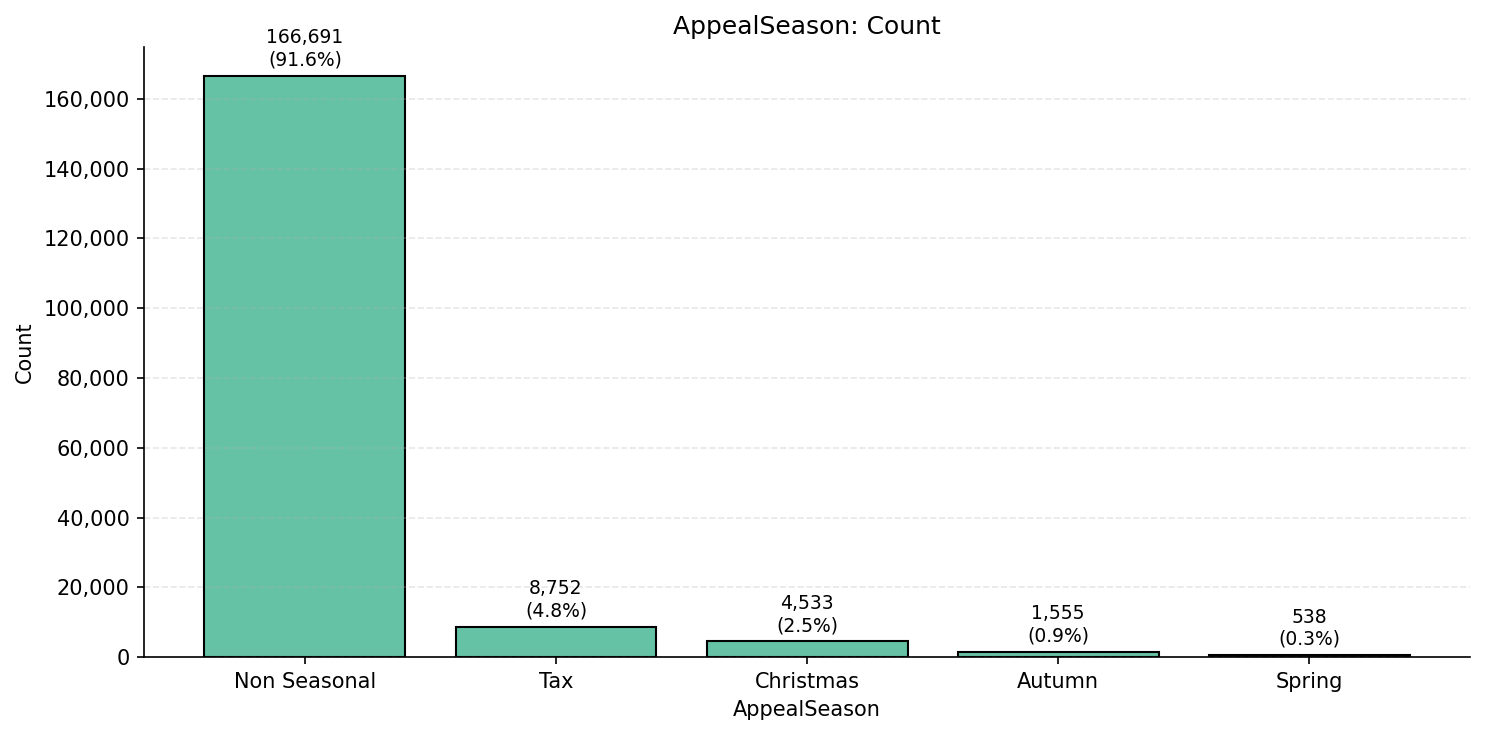

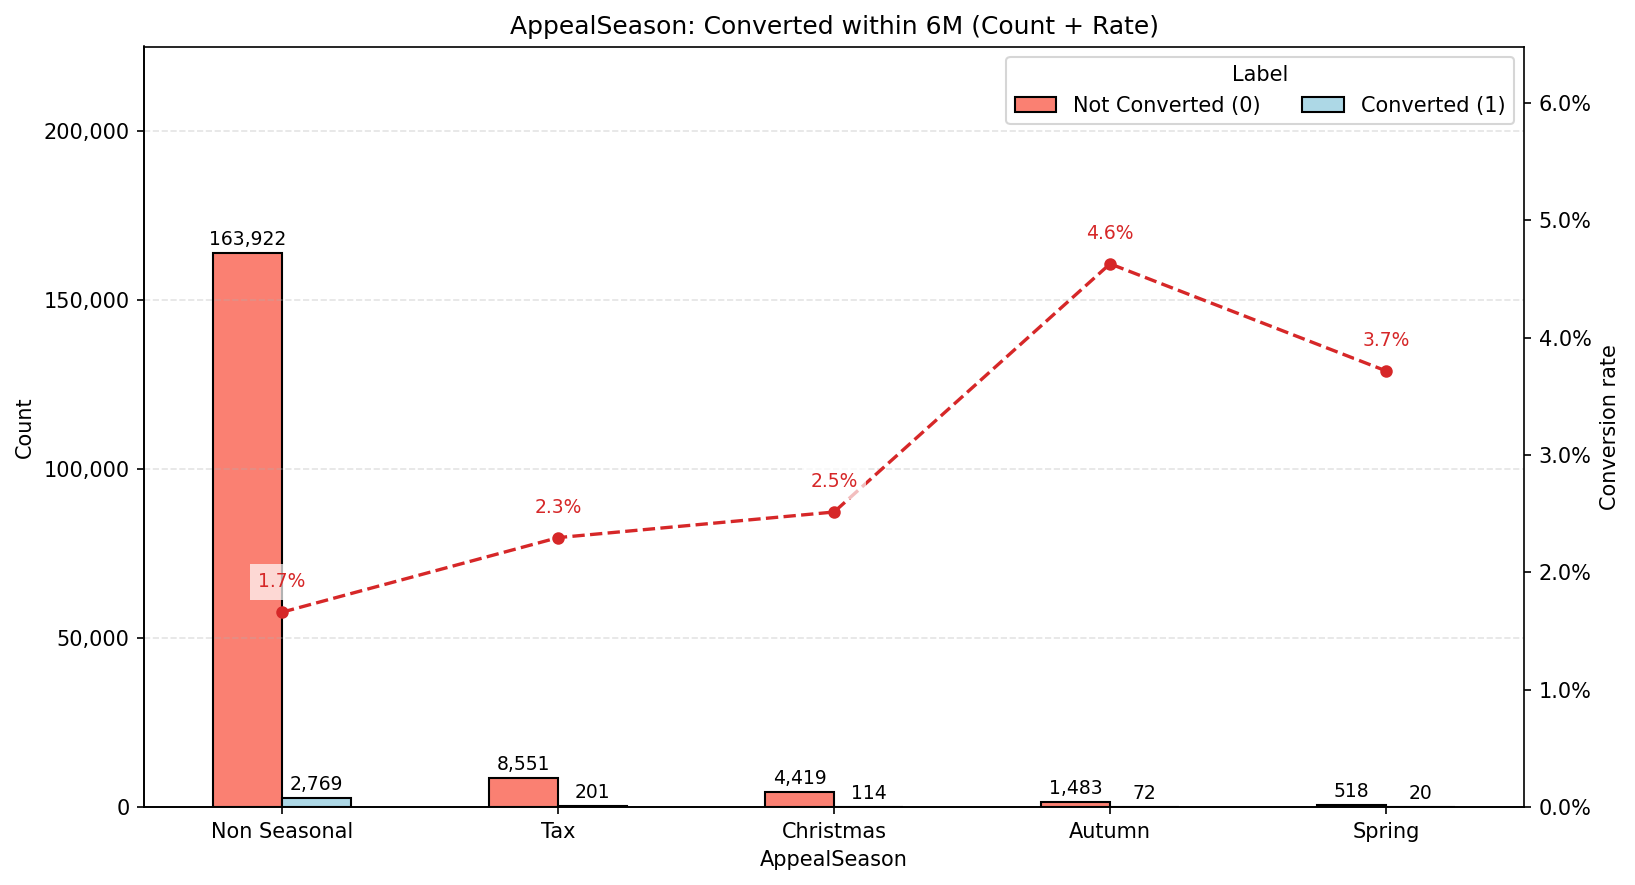

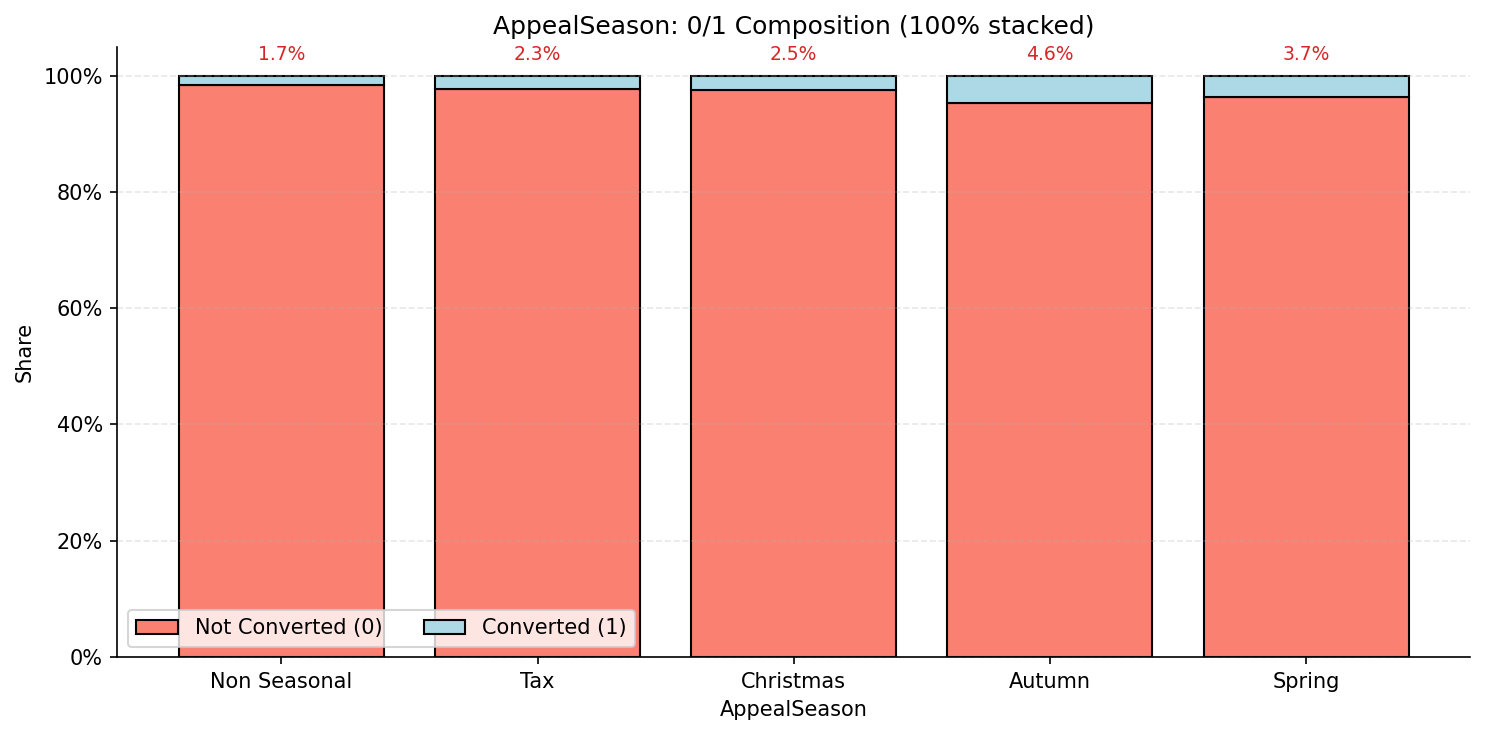

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, PercentFormatter

# ========= 参数 =========
COL    = "AppealSeason"
TARGET = "ConvertedTo_RG_Within_6M"
TOP_N  = 10   # 类别太多时仅保留前TOP_N，其余并为 Other

# ========= 预处理 =========
d = df_first_gift[[COL, TARGET]].copy()
d[COL] = d[COL].fillna("Unknown").astype(str)

# 若类别数量很多则合并为 Other
if d[COL].nunique() > TOP_N:
    topN = d[COL].value_counts().nlargest(TOP_N).index
    d[COL] = np.where(d[COL].isin(topN), d[COL], "Other")

# ——尽量按“自然季节/季度/月”排序，否则按样本量排序
values = d[COL].unique().tolist()
orders = [
    ["Spring","Summer","Autumn","Winter"],
    ["Summer","Autumn","Winter","Spring"],                 # 南半球常用
    ["Q1","Q2","Q3","Q4"],
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
]
order = None
for cand in orders:
    if set(values).issubset(set(cand)):
        # 只保留当前数据中出现的顺序
        order = [x for x in cand if x in values]
        break
if order is None:
    # 回退：按样本量降序
    order = d[COL].value_counts().sort_values(ascending=False).index.tolist()

d[COL] = pd.Categorical(d[COL], categories=order, ordered=True)

# ========= 图1：数量分布（柱顶“数量+占比”）=========
counts = d[COL].value_counts().reindex(order)
total  = counts.sum()

fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
bars = ax.bar(range(len(counts)), counts.values, edgecolor="black", color="#66c2a5")
ax.set_xticks(range(len(counts))); ax.set_xticklabels(order, rotation=0, ha="center")
ax.set_title(f"{COL}: Count")
ax.set_xlabel(COL); ax.set_ylabel("Count")
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{int(v):,}"))
ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.spines["top"].set_visible(False); ax.spines["right"].set_visible(False)

labels = [f"{v:,}\n({v/total:.1%})" for v in counts.values]
try:
    ax.bar_label(bars, labels=labels, padding=3, fontsize=9)
except Exception:
    for b, lab in zip(bars, labels):
        ax.text(b.get_x()+b.get_width()/2, b.get_height(), lab,
                ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

# ========= 图2：0/1人数 + 右轴转化率折线 =========
ct = pd.crosstab(d[COL], d[TARGET]).reindex(order).reindex(columns=[0,1], fill_value=0)

fig, ax = plt.subplots(figsize=(11, 6), dpi=150)
ct.plot(kind="bar", ax=ax, rot=0, color=["salmon","lightblue"], edgecolor="black")
ax.set_title(f"{COL}: Converted within 6M (Count + Rate)")
ax.set_xlabel(COL); ax.set_ylabel("Count")
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{int(v):,}"))
ax.legend(["Not Converted (0)", "Converted (1)"], title="Label", ncol=2)
ax.grid(axis="y", linestyle="--", alpha=0.35)
ax.spines["top"].set_visible(False); ax.spines["right"].set_visible(False)

# 柱顶数量
ax.set_ylim(0, ct.sum(axis=1).max() * 1.35)
for container in ax.containers:
    ax.bar_label(container,
                 labels=[f"{int(v):,}" for v in container.datavalues],
                 padding=2, fontsize=9)

# 右轴：转化率折线 + 标注
rate = (ct[1] / ct.sum(axis=1)).values
ax2 = ax.twinx()
ax2.plot(range(len(order)), rate, marker="o", linestyle="--", color="tab:red",
         linewidth=1.6, markersize=5, zorder=3, label="Conversion rate")
ax2.set_ylabel("Conversion rate")
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))
ax2.set_ylim(0, max(0.05, rate.max() * 1.4))

for i, r in enumerate(rate):
    ax2.annotate(f"{r:.1%}", xy=(i, r), xytext=(0, 10),
                 textcoords="offset points", ha="center", va="bottom",
                 fontsize=9, color="tab:red",
                 bbox=dict(fc="white", ec="none", alpha=0.7))

plt.tight_layout()
plt.show()

# ========= （可选）图3：100%堆叠占比（更直观看转化占比）=========
prop = ct.div(ct.sum(axis=1), axis=0)
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
bottom = np.zeros(len(prop))
colors = ["salmon", "lightblue"]
for j, col in enumerate([0,1]):
    vals = prop[col].values
    ax.bar(range(len(order)), vals, bottom=bottom, label=f"{col}",
           color=colors[j], edgecolor="black")
    bottom += vals

ax.set_xticks(range(len(order))); ax.set_xticklabels(order, rotation=0, ha="center")
ax.set_title(f"{COL}: 0/1 Composition (100% stacked)")
ax.set_xlabel(COL); ax.set_ylabel("Share")
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.legend(["Not Converted (0)", "Converted (1)"], ncol=2)
ax.grid(axis="y", linestyle="--", alpha=0.3)
ax.spines["top"].set_visible(False); ax.spines["right"].set_visible(False)

# 在“Converted(1)”段上方标注百分比
converted_share = prop[1].values
for i, s in enumerate(converted_share):
    ax.text(i, 1.02, f"{s:.1%}", ha="center", va="bottom",
            fontsize=9, color="tab:red")

plt.tight_layout()
plt.show()

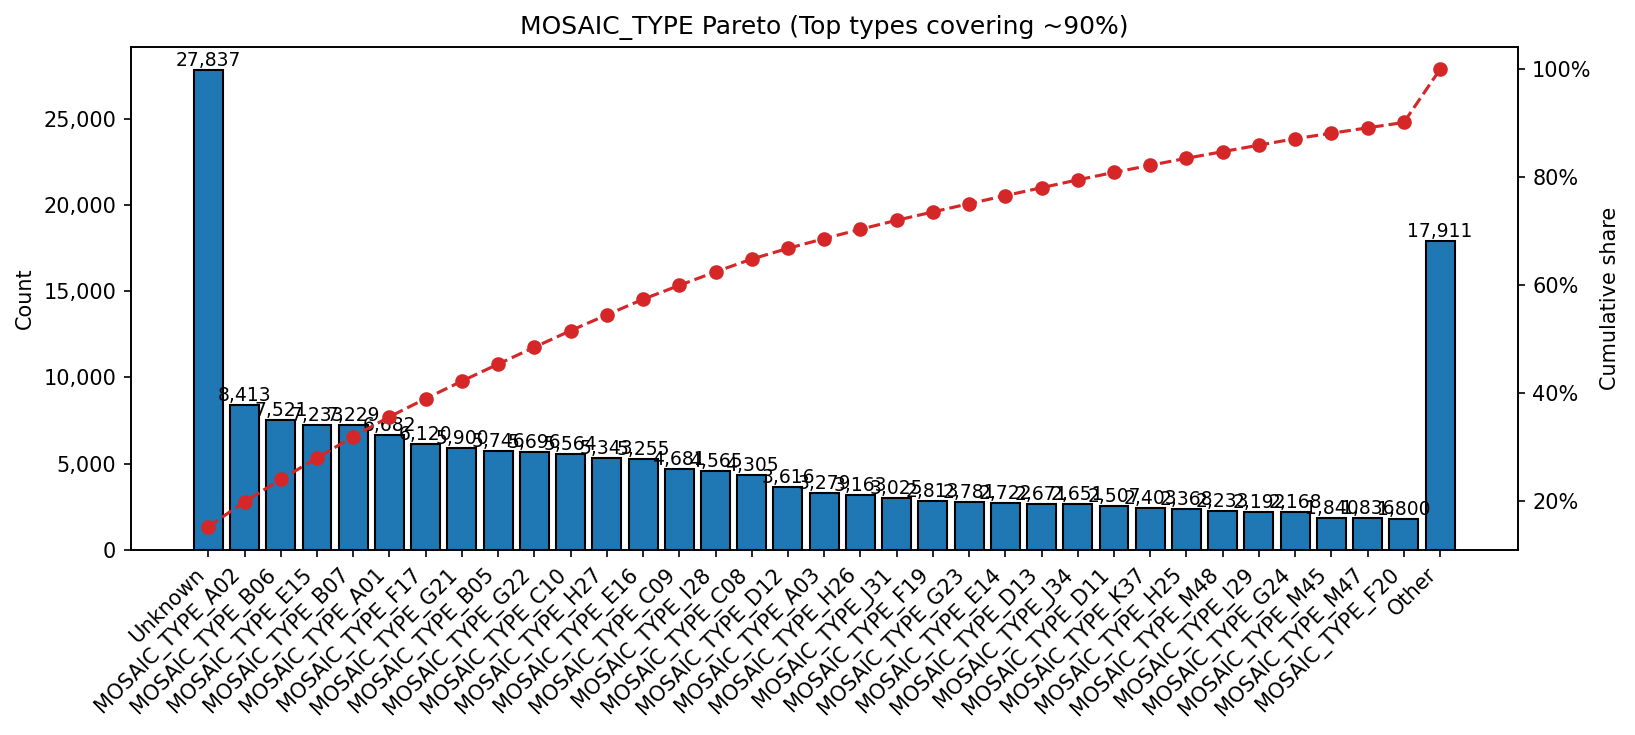

In [139]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, PercentFormatter

col, target = "MOSAIC_TYPE", "ConvertedTo_RG_Within_6M"
s = df_first_gift[col].fillna("Unknown").astype(str).value_counts()
cum = s.cumsum()/s.sum()

# 取覆盖到90%的类型（把超过90%的第一个也包含上，避免断层）
keep = cum.index[cum.le(0.90) | (cum.eq(cum[cum.gt(0.90)].min()))]

d = df_first_gift[[col]].copy()
d[col] = np.where(d[col].isin(keep), d[col], "Other")
counts = d[col].value_counts().loc[list(keep)+["Other"]]

# 画 Pareto
fig, ax = plt.subplots(figsize=(11,5), dpi=150)
bars = ax.bar(range(len(counts)), counts.values, edgecolor="black")
ax.set_xticks(range(len(counts))); ax.set_xticklabels(counts.index, rotation=45, ha="right")
ax.set_ylabel("Count"); ax.set_title("MOSAIC_TYPE Pareto (Top types covering ~90%)")
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: f"{int(v):,}"))
for b, v in zip(bars, counts.values):
    ax.text(b.get_x()+b.get_width()/2, b.get_height(), f"{v:,}", ha="center", va="bottom", fontsize=9)

ax2 = ax.twinx()
cum2 = counts.cumsum()/counts.sum()
ax2.plot(range(len(counts)), cum2.values, marker="o", linestyle="--", color="tab:red")
ax2.yaxis.set_major_formatter(PercentFormatter(1.0))
ax2.set_ylabel("Cumulative share")

plt.tight_layout(); plt.show()

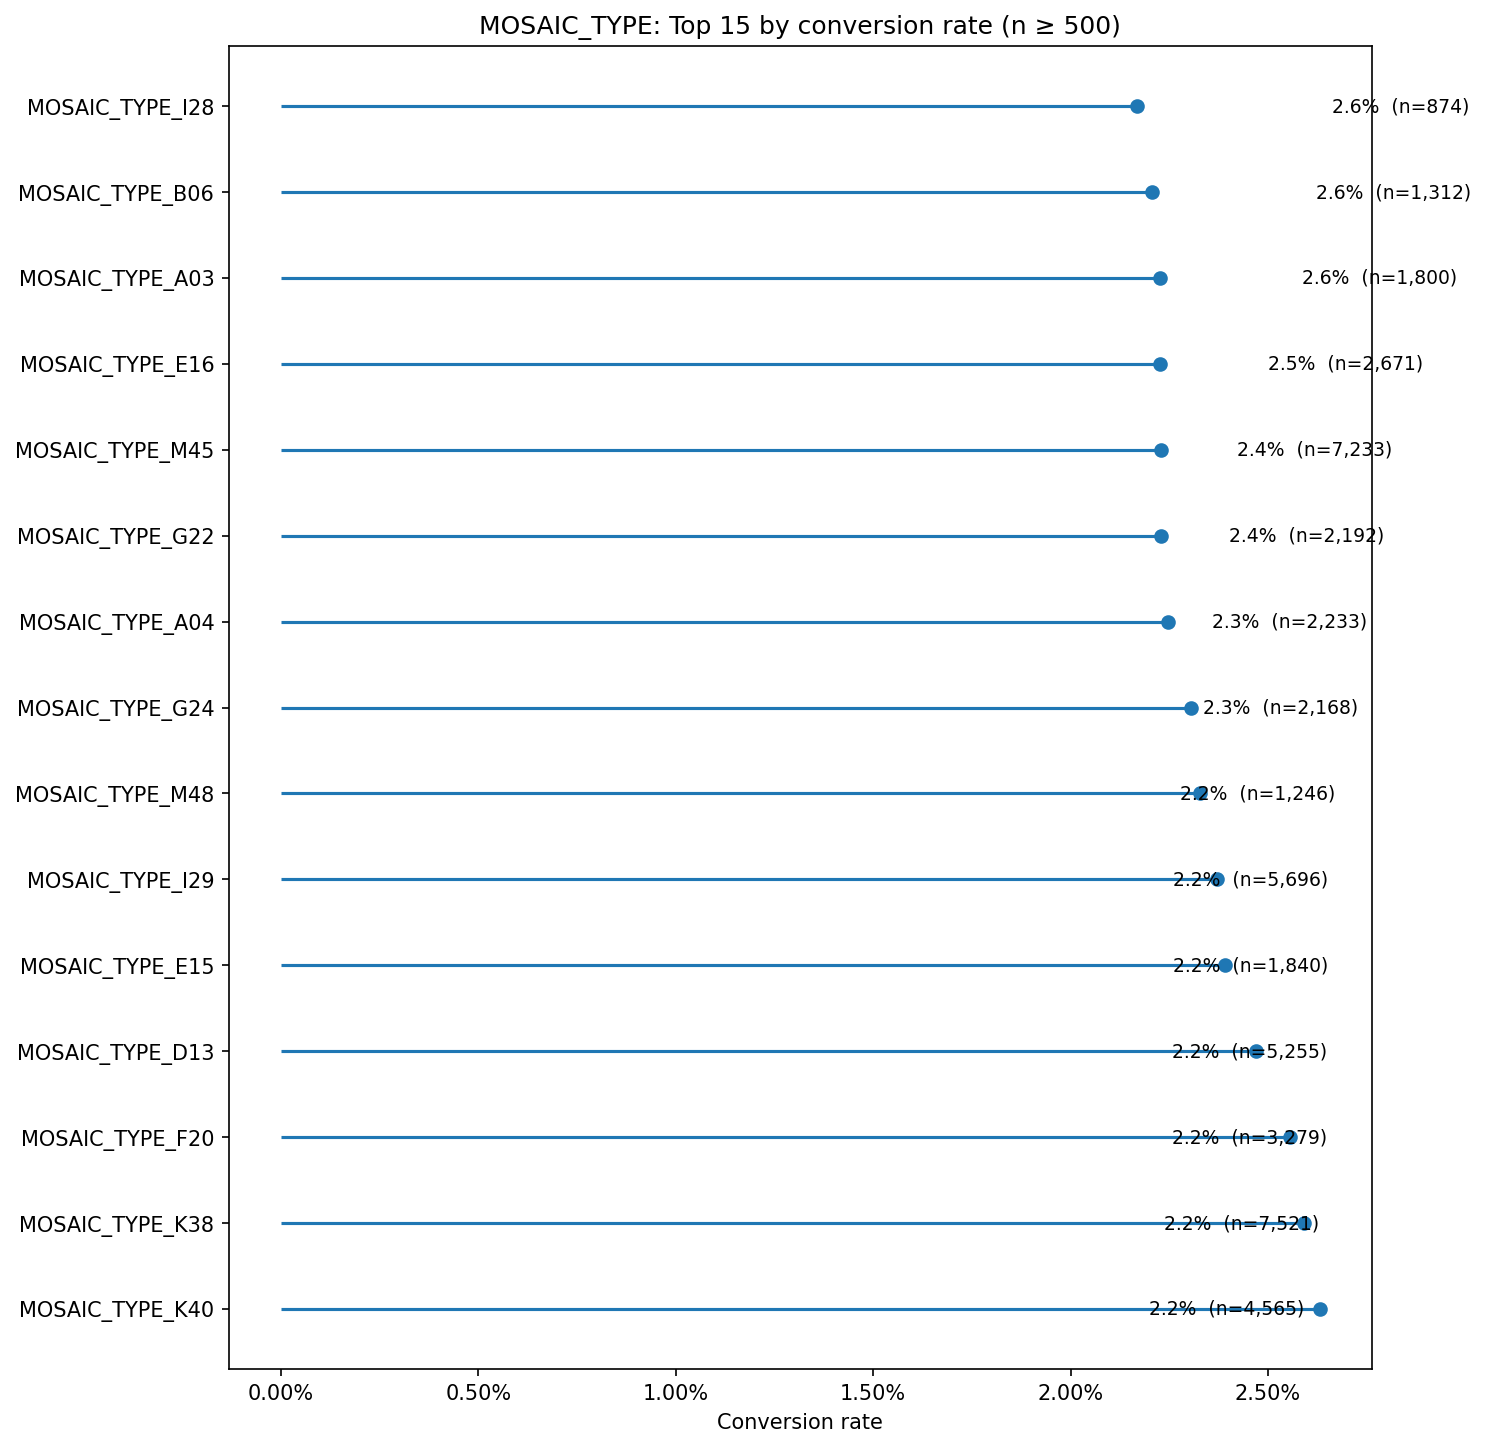

In [140]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

col, target = "MOSAIC_TYPE", "ConvertedTo_RG_Within_6M"
min_n, topN = 500, 15

g = df_first_gift.groupby(col)[target].agg(['sum','count'])
g['rate'] = g['sum'] / g['count']
g2 = g[g['count'] >= min_n].sort_values('rate', ascending=False).head(topN)

fig, ax = plt.subplots(figsize=(10, 0.45*len(g2)+3), dpi=150)
y = np.arange(len(g2))[::-1]  # 让top在上
ax.hlines(y=y, xmin=0, xmax=g2['rate'].values[::-1])
ax.plot(g2['rate'].values[::-1], y, 'o')
ax.set_yticks(y); ax.set_yticklabels(g2.index[::-1])
ax.set_xlabel("Conversion rate"); ax.set_title(f"MOSAIC_TYPE: Top {topN} by conversion rate (n ≥ {min_n})")
ax.xaxis.set_major_formatter(PercentFormatter(1.0))

# 标注百分比与样本数
for yi, (r, n) in enumerate(zip(g2['rate'].values[::-1], g2['count'].values[::-1])):
    ax.text(r, yi, f"  {r:.1%}  (n={n:,})", va="center", fontsize=9)

plt.tight_layout(); plt.show()

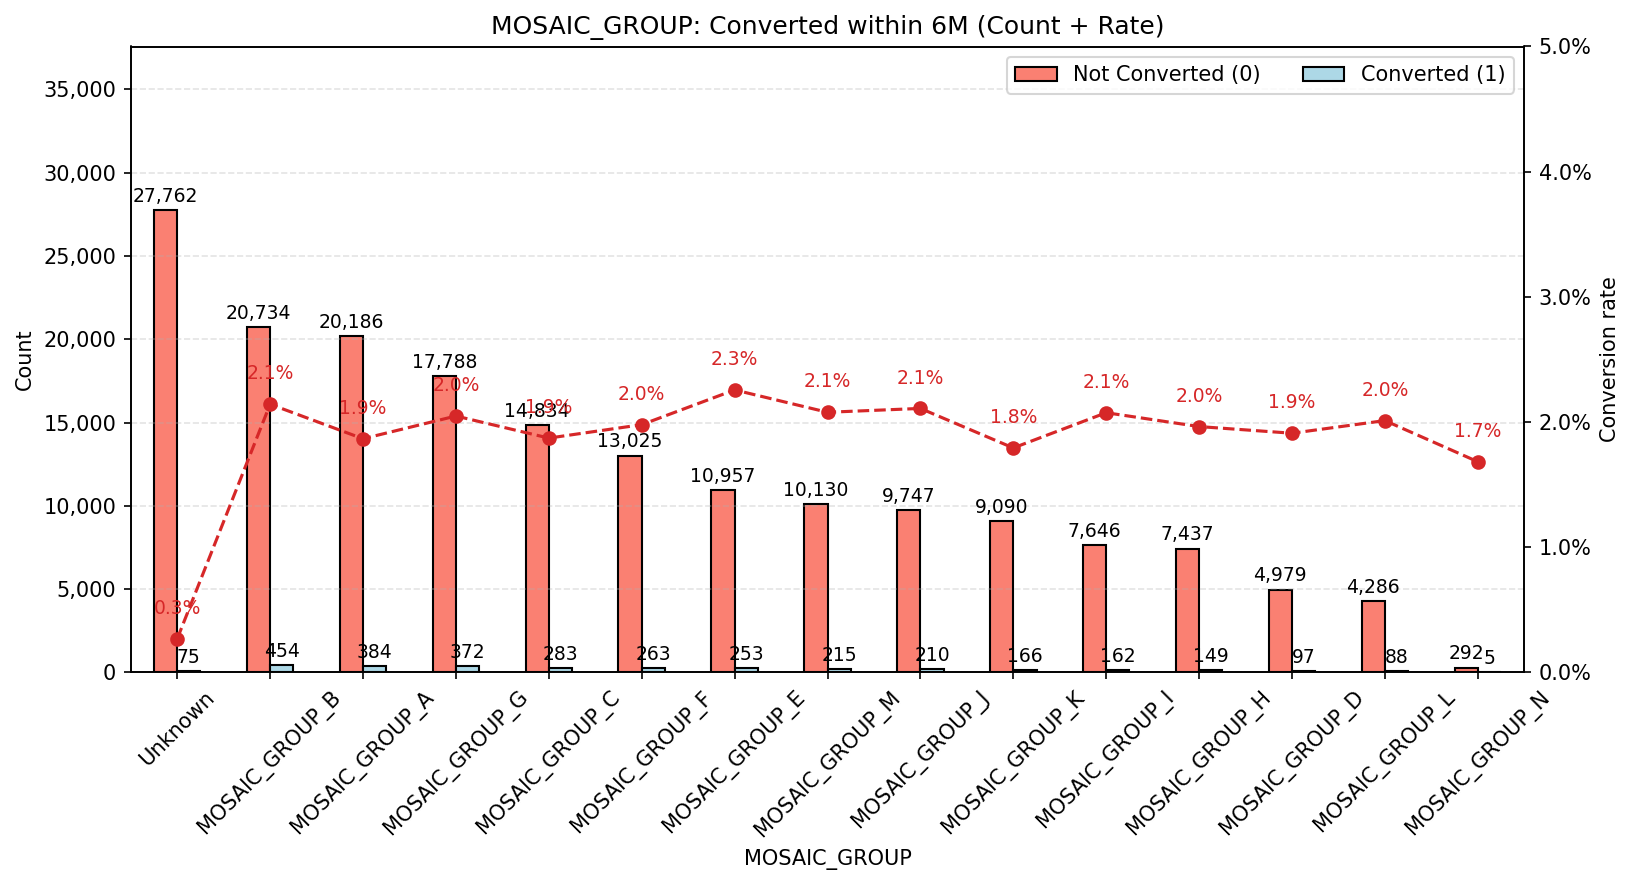

In [141]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, PercentFormatter

col, target = "MOSAIC_GROUP", "ConvertedTo_RG_Within_6M"
d = df_first_gift[[col, target]].copy()
d[col] = d[col].fillna("Unknown").astype(str)

order = d[col].value_counts().index.tolist()
ct = pd.crosstab(d[col], d[target]).reindex(order).reindex(columns=[0,1], fill_value=0)

fig, ax = plt.subplots(figsize=(11,6), dpi=150)
ct.plot(kind="bar", ax=ax, rot=45, edgecolor="black", color=["salmon","lightblue"])
ax.set_title("MOSAIC_GROUP: Converted within 6M (Count + Rate)")
ax.set_xlabel("MOSAIC_GROUP"); ax.set_ylabel("Count")
ax.yaxis.set_major_formatter(FuncFormatter(lambda v, p: f"{int(v):,}"))
ax.legend(["Not Converted (0)","Converted (1)"], ncol=2)
ax.grid(axis="y", linestyle="--", alpha=0.35)
ax.set_ylim(0, ct.sum(axis=1).max()*1.35)
for container in ax.containers:
    ax.bar_label(container, labels=[f"{int(v):,}" for v in container.datavalues], padding=2, fontsize=9)

rate = (ct[1]/ct.sum(axis=1)).values
ax2 = ax.twinx()
ax2.plot(range(len(order)), rate, marker="o", linestyle="--", color="tab:red")
ax2.set_ylabel("Conversion rate"); ax2.yaxis.set_major_formatter(PercentFormatter(1.0))
ax2.set_ylim(0, max(0.05, rate.max()*1.4))
for i, r in enumerate(rate):
    ax2.annotate(f"{r:.1%}", xy=(i, r), xytext=(0, 10), textcoords="offset points",
                 ha="center", va="bottom", fontsize=9, color="tab:red")

plt.tight_layout(); plt.show()

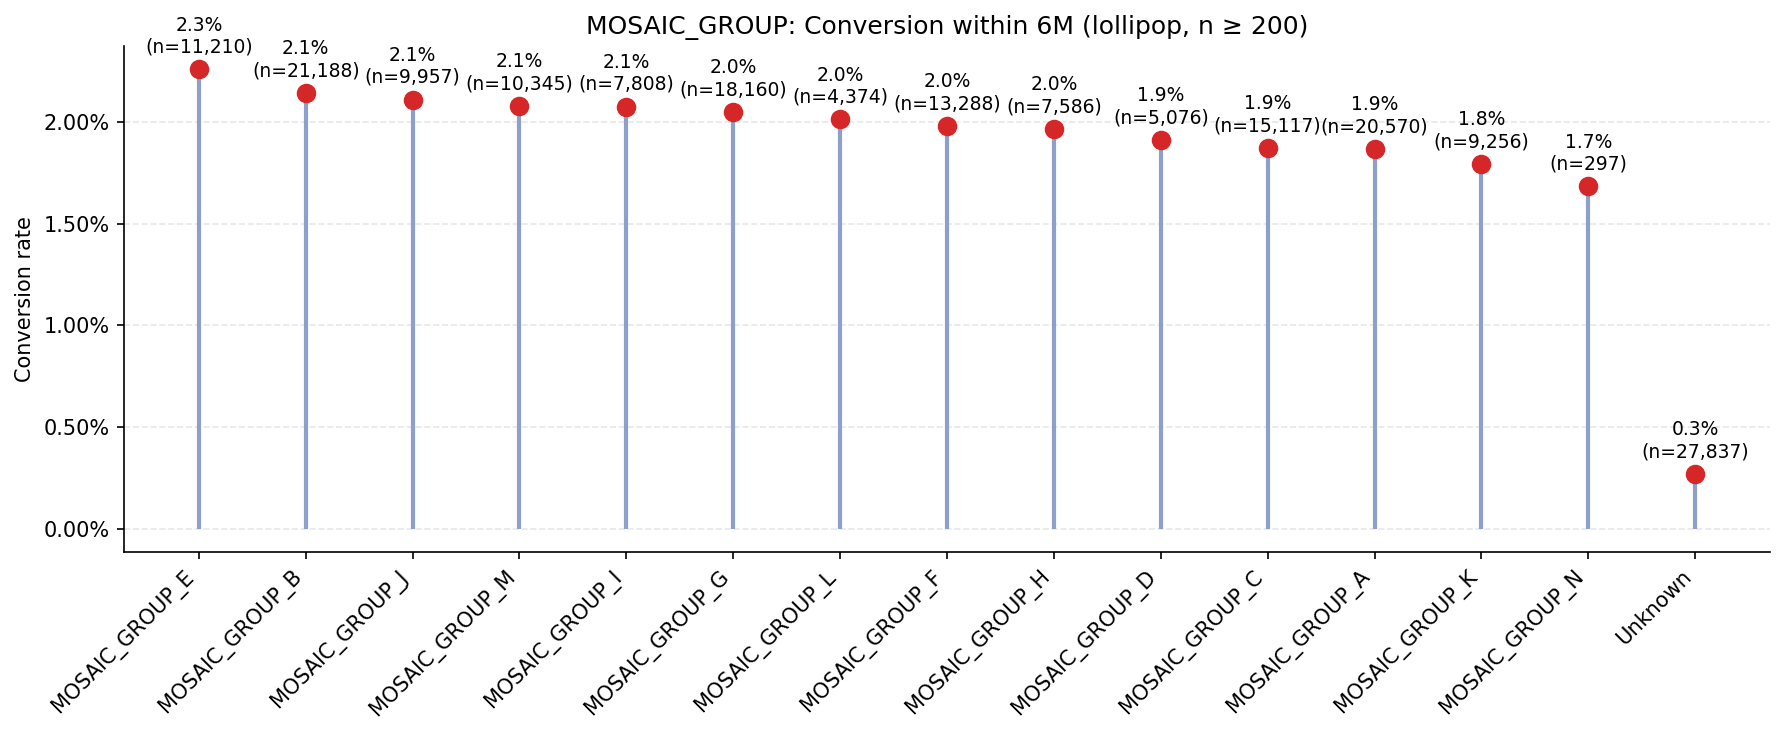

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

COL, TARGET = "MOSAIC_GROUP", "ConvertedTo_RG_Within_6M"
MIN_N = 200   # 最小样本门槛（可调）；想看全部就设为 0

# 1) 计算各组的样本量与转化率
g = df_first_gift.groupby(COL)[TARGET].agg(converted='sum', total='count')
g['rate'] = g['converted'] / g['total']

# 2) 过滤小样本并按“转化率”降序（也可换成 'total'）
g2 = g[g['total'] >= MIN_N].sort_values('rate', ascending=False)

# 3) 纵向棒棒糖：X 轴为 MOSAIC_GROUP
x = np.arange(len(g2))
fig, ax = plt.subplots(figsize=(max(10, 0.8*len(g2)), 5), dpi=150)

# 茎
ax.vlines(x=x, ymin=0, ymax=g2['rate'].values, color='#8da0cb', linewidth=2)
# 糖
ax.scatter(x, g2['rate'].values, s=70, color='tab:red', zorder=3)

# 轴与标题
ax.set_xticks(x); ax.set_xticklabels(g2.index, rotation=45, ha='right')
ax.set_ylabel("Conversion rate"); ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_title(f"MOSAIC_GROUP: Conversion within 6M (lollipop, n ≥ {MIN_N})")
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)

# 标注：转化率 + 样本量
for xi, (r, n) in enumerate(zip(g2['rate'].values, g2['total'].values)):
    ax.annotate(f"{r:.1%}\n(n={n:,})", xy=(xi, r), xytext=(0, 8),
                textcoords='offset points', ha='center', fontsize=9)

plt.tight_layout(); plt.show()

In [100]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

SupporterID
Age_Bucket
State
PostCode
Have_Phone
Have_Email
Gift_ID
Is_First_Gift
ProductType_Group
CampaignSubtype_Group
AppealSeason


In [101]:
df.head().isna()

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,Is_First_Gift,ProductType_Group,GiftSolicitationChannel,CampaignSubtype_Group,AppealSeason,GiftAmount,ConvertedTo_RG_Within_6M,POSTCODE,MOSAIC_TYPE,MOSAIC_GROUP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [102]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        # Check datatype of target column
        column_datatype = df[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

Column name: SupporterID | Column dtype: object | Example value: ['C-990328532'] | Example value dtype: string
Column name: Age_Bucket | Column dtype: object | Example value: ['51-60'] | Example value dtype: string
Column name: State | Column dtype: category | Example value: ['NSW']
Categories (10, object): ['NSW' < 'VIC' < 'WA' < 'QLD' ... 'TAS' < 'NT' < 'INT' < 'Other'] | Example value dtype: categorical
Column name: PostCode | Column dtype: object | Example value: ['6008'] | Example value dtype: string
Column name: Have_Phone | Column dtype: object | Example value: ['Yes'] | Example value dtype: string
Column name: Have_Email | Column dtype: object | Example value: ['No'] | Example value dtype: string
Column name: Gift_ID | Column dtype: object | Example value: ['0062u000009QrsYAAS'] | Example value dtype: string
Column name: Is_First_Gift | Column dtype: object | Example value: ['Not_First_Gift'] | Example value dtype: string
Column name: ProductType_Group | Column dtype: object | 

In [103]:
# Start a count of how many object type columns there are
number_of_object_type_columns = 0

for label, content in df.items():
    # Check to see if column is of object type (this will include the string columns)
    if pd.api.types.is_object_dtype(content): 
        # Check datatype of target column
        column_datatype = df[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

        number_of_object_type_columns += 1

print(f"\n[INFO] Total number of object type columns: {number_of_object_type_columns}")

Column name: SupporterID | Column dtype: object | Example value: ['C-990267159'] | Example value dtype: string
Column name: Age_Bucket | Column dtype: object | Example value: ['41-50'] | Example value dtype: string
Column name: Gender | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: PostCode | Column dtype: object | Example value: ['2912'] | Example value dtype: string
Column name: Have_Phone | Column dtype: object | Example value: ['Yes'] | Example value dtype: string
Column name: Have_Email | Column dtype: object | Example value: ['Yes'] | Example value dtype: string
Column name: Gift_ID | Column dtype: object | Example value: ['0062u000009Qe3YAAS'] | Example value dtype: string
Column name: IsEmergencyGift | Column dtype: object | Example value: [nan] | Example value dtype: empty
Column name: Is_First_Gift | Column dtype: object | Example value: ['Not_First_Gift'] | Example value dtype: string
Column name: ProductType_Group | Column dtype: obje

In [104]:
# This will turn all of the object columns into category values
for label, content in df.items(): 
    if pd.api.types.is_object_dtype(content):
        df[label] = df[label].astype("category")

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780140 entries, 0 to 1780139
Data columns (total 20 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   SupporterID               category      
 1   Age_Bucket                category      
 2   Gender                    category      
 3   State                     category      
 4   PostCode                  category      
 5   Have_Phone                category      
 6   Have_Email                category      
 7   Gift_ID                   category      
 8   GiftDate                  datetime64[ns]
 9   IsEmergencyGift           category      
 10  Is_First_Gift             category      
 11  ProductType_Group         category      
 12  GiftSolicitationChannel   category      
 13  CampaignSubtype_Group     category      
 14  AppealSeason              category      
 15  GiftAmount                float64       
 16  ConvertedTo_RG_Within_6M  int64         
 17  POSTCODE

In [106]:
df.State.cat.categories

Index(['NSW', 'VIC', 'WA', 'QLD', 'ACT', 'SA', 'TAS', 'NT', 'INT', 'Other'], dtype='object')

In [107]:
# Inspect the category codes
df.State.cat.codes

0          3
1          1
2          7
3          0
4          2
          ..
1780135    2
1780136    0
1780137    0
1780138    0
1780139    1
Length: 1780140, dtype: int8

In [113]:
target_state_cat_number = 9
target_state_cat_value = df.State.cat.categories[target_state_cat_number] 
print(f"[INFO] Target state category number {target_state_cat_number} maps to: {target_state_cat_value}")

[INFO] Target state category number 9 maps to: Other


In [114]:
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        # Turn object columns into category datatype
        df[label] = df[label].astype("category")

In [115]:
# Check missing values
df.isna().sum().sort_values(ascending=False)[:20]

IsEmergencyGift             1630762
Gender                       473180
MOSAIC_GROUP                 114768
MOSAIC_TYPE                  114768
POSTCODE                     114768
GiftSolicitationChannel       21053
ProductType_Group                 0
ConvertedTo_RG_Within_6M          0
GiftAmount                        0
AppealSeason                      0
CampaignSubtype_Group             0
SupporterID                       0
Age_Bucket                        0
GiftDate                          0
Gift_ID                           0
Have_Email                        0
Have_Phone                        0
PostCode                          0
State                             0
Is_First_Gift                     0
dtype: int64

In [116]:
# Find numeric columns 
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        # Check datatype of target column
        column_datatype = df[label].dtype.name

        # Get random sample from column values
        example_value = content.sample(1).values

        # Infer random sample datatype
        example_value_dtype = pd.api.types.infer_dtype(example_value)
        print(f"Column name: {label} | Column dtype: {column_datatype} | Example value: {example_value} | Example value dtype: {example_value_dtype}")

Column name: GiftAmount | Column dtype: float64 | Example value: [42.] | Example value dtype: floating
Column name: ConvertedTo_RG_Within_6M | Column dtype: int64 | Example value: [0] | Example value dtype: integer


In [117]:
# Check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: GiftAmount | Has missing values: False
Column name: ConvertedTo_RG_Within_6M | Has missing values: False


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780140 entries, 0 to 1780139
Data columns (total 20 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   SupporterID               category      
 1   Age_Bucket                category      
 2   Gender                    category      
 3   State                     category      
 4   PostCode                  category      
 5   Have_Phone                category      
 6   Have_Email                category      
 7   Gift_ID                   category      
 8   GiftDate                  datetime64[ns]
 9   IsEmergencyGift           category      
 10  Is_First_Gift             category      
 11  ProductType_Group         category      
 12  GiftSolicitationChannel   category      
 13  CampaignSubtype_Group     category      
 14  AppealSeason              category      
 15  GiftAmount                float64       
 16  ConvertedTo_RG_Within_6M  int64         
 17  POSTCODE

In [119]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(f"Column name: {label} | Has missing values: {True}")
        else:
            print(f"Column name: {label} | Has missing values: {False}")

Column name: GiftAmount | Has missing values: False
Column name: ConvertedTo_RG_Within_6M | Has missing values: False


In [120]:
print(f"[INFO] Columns which are not numeric:")
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(f"Column name: {label} | Column dtype: {df[label].dtype.name}")

[INFO] Columns which are not numeric:
Column name: SupporterID | Column dtype: category
Column name: Age_Bucket | Column dtype: category
Column name: Gender | Column dtype: category
Column name: State | Column dtype: category
Column name: PostCode | Column dtype: category
Column name: Have_Phone | Column dtype: category
Column name: Have_Email | Column dtype: category
Column name: Gift_ID | Column dtype: category
Column name: GiftDate | Column dtype: datetime64[ns]
Column name: IsEmergencyGift | Column dtype: category
Column name: Is_First_Gift | Column dtype: category
Column name: ProductType_Group | Column dtype: category
Column name: GiftSolicitationChannel | Column dtype: category
Column name: CampaignSubtype_Group | Column dtype: category
Column name: AppealSeason | Column dtype: category
Column name: POSTCODE | Column dtype: category
Column name: MOSAIC_TYPE | Column dtype: category
Column name: MOSAIC_GROUP | Column dtype: category


In [121]:
# 1. Create a dictionary to store column to category values (e.g. we turn our category types into numbers but we keep a record so we can go back)
column_to_category_dict = {} 

# 2. Turn categorical variables into numbers
for label, content in df.items():

    # 3. Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):

        # 4. Add binary column to inidicate whether sample had missing value
        df[label+"_is_missing"] = pd.isnull(content).astype(int)

        # 5. Ensure content is categorical and get its category codes
        content_categories = pd.Categorical(content)
        content_category_codes = content_categories.codes + 1 # prevents -1 (the default for NaN values) from being used for missing values (we'll treat missing values as 0)

        # 6. Add column key to dictionary with code: category mapping per column
        column_to_category_dict[label] = dict(zip(content_category_codes, content_categories))
        
        # 7. Set the column to the numerical values (the category code value) 
        df[label] = content_category_codes  

In [123]:
df.sample(5)

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,...,GiftDate_is_missing,IsEmergencyGift_is_missing,Is_First_Gift_is_missing,ProductType_Group_is_missing,GiftSolicitationChannel_is_missing,CampaignSubtype_Group_is_missing,AppealSeason_is_missing,POSTCODE_is_missing,MOSAIC_TYPE_is_missing,MOSAIC_GROUP_is_missing
176884,12748,3,2,3,1694,2,1,383240,866,0,...,0,1,0,0,0,0,0,0,0,0
287089,53816,4,0,4,1343,1,1,736910,1149,1,...,0,0,0,0,0,0,0,0,0,0
1135383,149476,3,0,1,193,2,2,1149602,2757,0,...,0,1,0,0,0,0,0,0,0,0
561553,60128,2,1,3,1785,2,2,513245,1719,0,...,0,1,0,0,0,0,0,0,0,0
1764221,90157,2,2,2,637,2,2,1756474,3972,0,...,0,1,0,0,0,0,0,0,0,0


In [582]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780140 entries, 0 to 1780139
Data columns (total 38 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   SupporterID                         int32  
 1   Age_Bucket                          int8   
 2   Gender                              int8   
 3   State                               int16  
 4   PostCode                            int16  
 5   Have_Phone                          int8   
 6   Have_Email                          int8   
 7   Gift_ID                             int32  
 8   GiftDate                            int16  
 9   IsEmergencyGift                     int8   
 10  Is_First_Gift                       int8   
 11  ProductType_Group                   int8   
 12  GiftSolicitationChannel             int8   
 13  CampaignSubtype_Group               int8   
 14  AppealSeason                        int8   
 15  GiftAmount                          float64
 16  

In [124]:
for key, value in sorted(column_to_category_dict["GiftDate"].items()): # note: calling sorted() on dictionary.items() sorts the dictionary by keys 
    print(f"{key} -> {value}")

1 -> 2014-01-01 00:00:00
2 -> 2014-01-02 00:00:00
3 -> 2014-01-03 00:00:00
4 -> 2014-01-04 00:00:00
5 -> 2014-01-05 00:00:00
6 -> 2014-01-06 00:00:00
7 -> 2014-01-07 00:00:00
8 -> 2014-01-08 00:00:00
9 -> 2014-01-09 00:00:00
10 -> 2014-01-10 00:00:00
11 -> 2014-01-11 00:00:00
12 -> 2014-01-12 00:00:00
13 -> 2014-01-13 00:00:00
14 -> 2014-01-14 00:00:00
15 -> 2014-01-15 00:00:00
16 -> 2014-01-16 00:00:00
17 -> 2014-01-17 00:00:00
18 -> 2014-01-18 00:00:00
19 -> 2014-01-19 00:00:00
20 -> 2014-01-20 00:00:00
21 -> 2014-01-21 00:00:00
22 -> 2014-01-22 00:00:00
23 -> 2014-01-23 00:00:00
24 -> 2014-01-24 00:00:00
25 -> 2014-01-25 00:00:00
26 -> 2014-01-26 00:00:00
27 -> 2014-01-27 00:00:00
28 -> 2014-01-28 00:00:00
29 -> 2014-01-29 00:00:00
30 -> 2014-01-30 00:00:00
31 -> 2014-01-31 00:00:00
32 -> 2014-02-01 00:00:00
33 -> 2014-02-02 00:00:00
34 -> 2014-02-03 00:00:00
35 -> 2014-02-04 00:00:00
36 -> 2014-02-05 00:00:00
37 -> 2014-02-06 00:00:00
38 -> 2014-02-07 00:00:00
39 -> 2014-02-08 00:0

In [125]:
for key, value in sorted(column_to_category_dict['Age_Bucket'].items()): # note: calling sorted() on dictionary.items() sorts the dictionary by keys 
    print(f"{key} -> {value}")

1 -> 19 - 30
2 -> 31-40
3 -> 41-50
4 -> 51-60
5 -> 61-70
6 -> 71+


In [126]:
df.isna().sum()

SupporterID                           0
Age_Bucket                            0
Gender                                0
State                                 0
PostCode                              0
Have_Phone                            0
Have_Email                            0
Gift_ID                               0
GiftDate                              0
IsEmergencyGift                       0
Is_First_Gift                         0
ProductType_Group                     0
GiftSolicitationChannel               0
CampaignSubtype_Group                 0
AppealSeason                          0
GiftAmount                            0
ConvertedTo_RG_Within_6M              0
POSTCODE                              0
MOSAIC_TYPE                           0
MOSAIC_GROUP                          0
SupporterID_is_missing                0
Age_Bucket_is_missing                 0
Gender_is_missing                     0
State_is_missing                      0
PostCode_is_missing                   0


In [127]:
df.describe()

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,...,GiftDate_is_missing,IsEmergencyGift_is_missing,Is_First_Gift_is_missing,ProductType_Group_is_missing,GiftSolicitationChannel_is_missing,CampaignSubtype_Group_is_missing,AppealSeason_is_missing,POSTCODE_is_missing,MOSAIC_TYPE_is_missing,MOSAIC_GROUP_is_missing
count,1.780140e+06,1.780140e+06,1.780140e+06,1.780140e+06,1.780140e+06,1.780140e+06,1.780140e+06,1.780140e+06,1.780140e+06,1.780140e+06,...,1780140.0,1.780140e+06,1780140.0,1780140.0,1.780140e+06,1780140.0,1780140.0,1.780140e+06,1.780140e+06,1.780140e+06
mean,7.490924e+04,3.453805e+00,1.075104e+00,2.970818e+00,7.639822e+02,1.827702e+00,1.754979e+00,8.900705e+05,2.266887e+03,8.391362e-02,...,0.0,9.160864e-01,0.0,0.0,1.182660e-02,0.0,0.0,6.447133e-02,6.447133e-02,6.447133e-02
std,4.808633e+04,1.528738e+00,7.753974e-01,2.289189e+00,5.885007e+02,3.776391e-01,4.300995e-01,5.138823e+05,9.944419e+02,2.772583e-01,...,0.0,2.772583e-01,0.0,0.0,1.081052e-01,0.0,0.0,2.455907e-01,2.455907e-01,2.455907e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.717500e+04,2.000000e+00,0.000000e+00,1.000000e+00,2.250000e+02,2.000000e+00,2.000000e+00,4.450358e+05,1.476000e+03,0.000000e+00,...,0.0,1.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.061300e+04,3.000000e+00,1.000000e+00,2.000000e+00,6.450000e+02,2.000000e+00,2.000000e+00,8.900705e+05,2.353000e+03,0.000000e+00,...,0.0,1.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.088750e+05,5.000000e+00,2.000000e+00,4.000000e+00,1.214000e+03,2.000000e+00,2.000000e+00,1.335105e+06,3.057000e+03,0.000000e+00,...,0.0,1.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
max,1.917950e+05,6.000000e+00,4.000000e+00,1.000000e+01,2.072000e+03,2.000000e+00,2.000000e+00,1.780140e+06,4.018000e+03,1.000000e+00,...,0.0,1.000000e+00,0.0,0.0,1.000000e+00,0.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00


In [146]:
df.Is_First_Gift.value_counts()

Is_First_Gift
Not_First_Gift    1589590
Is_First_Gift      190550
Name: count, dtype: int64

In [145]:
df.ProductType_Group.value_counts()

ProductType_Group
RG - Global Parent          1461521
Cash - One off               227120
RG - Paddington Postcard      42781
Cash - Inspired Gifts         30977
Community Fundraising         17662
RG - Wiggles                     79
Name: count, dtype: int64

In [14]:
df.nlargest(10, 'GiftAmount')  

,SupporterID,Age_Bucket,Gender,State,PostCode,Have_Phone,Have_Email,Gift_ID,GiftDate,IsEmergencyGift,Is_First_Gift,ProductType_Group,GiftSolicitationChannel,CampaignSubtype_Group,AppealSeason,GiftAmount,ConvertedTo_RG_Within_6M
249432,C-990281901,71+,Female,QLD,4122.0,Yes,Yes,0062u000009T6FkAAK,2019-06-30,NaN,Not_First_Gift,Cash - One off,Web,Appeal,Tax,28000.0,0
249433,C-990281901,71+,Female,QLD,4122.0,Yes,Yes,0062u000009T6FmAAK,2019-06-30,NaN,Not_First_Gift,Cash - One off,Web,Appeal,Tax,14000.0,0
249434,C-990281901,31-40,Female,QLD,4122.0,Yes,Yes,0062u000009T6FlAAK,2019-06-30,NaN,Not_First_Gift,Cash - One off,Web,Appeal,Tax,14000.0,0
249435,C-990281901,61-70,Female,QLD,4122.0,Yes,Yes,0062u000009T6FnAAK,2019-06-30,NaN,Not_First_Gift,Cash - One off,Web,Appeal,Tax,14000.0,0
1313778,C-990393107,31-40,Female,NSW,2047.0,Yes,Yes,0062u00000DCxSWAA1,2021-10-14,NaN,Not_First_Gift,Cash - One off,DM,Appeal,Autumn,14000.0,0
15013,C-990244714,41-50,Female,NSW,2067.0,No,Yes,0062u0000092fGmAAI,2014-06-05,NaN,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,11200.0,0
372289,C-990300381,31-40,Male,VIC,3192.0,Yes,Yes,0068v000002F457AAC,2022-06-15,Yes,Not_First_Gift,Cash - One off,Web,Appeal,Tax,10500.0,0
1864,C-990191122,41-50,Female,NSW,2193.0,Yes,Yes,0068v000002AptjAAC,2022-03-11,Yes,Is_First_Gift,Community Fundraising,NaN,Community Fundraising,Non Seasonal,9800.0,0
1085295,C-990369278,71+,Male,NSW,2066.0,Yes,Yes,0062u000009KF61AAG,2018-03-23,NaN,Is_First_Gift,Cash - One off,Web,Appeal,Non Seasonal,7700.0,0
51477,C-990268034,51-60,Male,QLD,4505.0,Yes,Yes,0062u000009SKm6AAG,2020-06-30,Yes,Not_First_Gift,Cash - One off,Web,Appeal,Tax,7224.0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1287907 entries, 6 to 1780110
Data columns (total 17 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   SupporterID               1287907 non-null  object 
 1   Age_Bucket                1287907 non-null  object 
 2   Gender                    1287907 non-null  object 
 3   State                     1287907 non-null  object 
 4   PostCode                  1287907 non-null  float64
 5   Have_Phone                1287907 non-null  object 
 6   Have_Email                1287907 non-null  object 
 7   Gift_ID                   1287907 non-null  object 
 8   GiftDate                  1287907 non-null  object 
 9   IsEmergencyGift           55454 non-null    object 
 10  Is_First_Gift             1287907 non-null  object 
 11  ProductType_Group         1287907 non-null  object 
 12  GiftSolicitationChannel   1284838 non-null  object 
 13  CampaignSubtype_Group     128790

In [17]:
df. IsEmergencyGift.value_counts()

IsEmergencyGift
Yes    55454
Name: count, dtype: int64

In [18]:
df['IsEmergencyGift'] = df['IsEmergencyGift'].fillna('No or Unknown')

In [19]:
df. IsEmergencyGift.value_counts()

IsEmergencyGift
No or Unknown    1232453
Yes                55454
Name: count, dtype: int64

In [20]:
df.GiftSolicitationChannel.value_counts()

GiftSolicitationChannel
F2F              356122
Web              349811
Door to door     259231
Telemarketing    137489
Retail           118243
DM                19889
Unsolicited       15619
Travel Trip       10169
EDM                7010
General            6894
B2B                2464
SMS                1524
DRTV                265
TV                   70
Inserts              38
Name: count, dtype: int64

In [21]:
df['GiftSolicitationChannel'] = df['GiftSolicitationChannel'].fillna('No or unknown')

In [22]:
df.Gender.value_counts()

Gender
Female               689211
Male                 598586
Non-Binary               97
Prefer Not To Say        13
Name: count, dtype: int64

In [23]:
df.Age_Bucket.value_counts()

Age_Bucket
31-40      355754
41-50      283850
51-60      212137
71+        188835
61-70      164149
19 - 30     83182
Name: count, dtype: int64

In [24]:
df.Is_First_Gift.value_counts()

Is_First_Gift
Not_First_Gift    1214688
Is_First_Gift       73219
Name: count, dtype: int64

In [25]:
df.ConvertedTo_RG_Within_6M.value_counts()

ConvertedTo_RG_Within_6M
0    1182611
1     105296
Name: count, dtype: int64

In [26]:
df.IsEmergencyGift.value_counts()

IsEmergencyGift
No or Unknown    1232453
Yes                55454
Name: count, dtype: int64

In [27]:
df.ConvertedTo_RG_Within_6M.value_counts()

ConvertedTo_RG_Within_6M
0    1182611
1     105296
Name: count, dtype: int64